# House Prices - Advanced Regression Techniques

**Predict sales prices and practice feature engineering, RFs, and gradient boosting**

**MIDS - W207 - Fall Semester 2021 - Team 1**

- Anshuman Awasthi
- Ruilan Liu
- Dante Malagrino
- Viswanathan Thiagarajan

# Introduction

Predicting house prices using machine learning is gaining momentum and interest for several reasons. Individuals and real-estate agents use this data to buy/sell houses knowing the estimated market value. Corporations use complex models to predict the prices and trends to make profit flipping houses.

As seen in the recent [news](https://www.seattletimes.com/business/real-estate/zillow-selling-off-homes-as-it-shutters-house-flipping-business/), Zillow is winding down its failed homebuying business.  Predicting house prices is not straightforward or easy. Several external factors like macroeconomic trends, interest rates, and human behavior influence sale prices. The prediction may be challenging even with large datasets and advanced algorithms. According to various news [reports](https://www.wired.com/story/zillow-ibuyer-real-estate/), Zillow’s iBuyer arm, launched in 2018, using algorithms to quickly value, buy, and sell homes, failed to forecast the housing market of 2021. The unpredictability could be attributed to buying behavior and preference changes, induced by the pandemic. In the 3rd quarter of 2021, Zillow sold homes for 5-7% less than its forecast, and as a result, the company has $2.9 billion in debt related to algorithmic buying/selling as of Sep 2021.

However, [research](https://www.nber.org/papers/w28252) by the National Bureau of Economic Research (NBER) shows that the algorithmic advances in home valuation accuracy provide an advantage for businesses in the intermediation services, as seen in the success of Redfin. The company has successfully used machine learning to make home price estimates and recommendations for users and competitive market analysis (CMA) to agents.

Hence, housing price prediction is vital to house buyers and agents alike, preparing them for the transactions, helping individuals make fair profits from flipping, and helping create new forms of real-estate related business. 


## Inference Problem

The inference problem we are set to solve with this project is the following:

$X \rightarrow Y̅= f_h(X,\theta)$

where $X$ represents a collection of information (features) about real estate properties, describing several different characteristics of the houses for sale, and $Y̅$ is the predicted sale price. $f_h(X,\theta)$ is the model with $\theta$ as the parameters and $h$ as the hyperparameters.

## Dataset

The dataset that will be used for building the model is the [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf), which was compiled for research purposes as an alternative to the more classic Boston Housing dataset, abundantly used in the past.  This dataset contains over 1400 entries of sales transaction that have taken place in the time period between 2006 and 2010 in Ames, Iowa.  Each entry has 79 explanatory variables (potential features) that describe the properties being sold.

In [3]:
%matplotlib inline

import sys
from copy import deepcopy
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
import time as time
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
# Read the .csv files into the df_train and df_test datasets

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print (f'The training dataset contains: {color.BOLD}{df_train.shape[0]:4d}{color.END} samples '
       f'and {color.BOLD}{df_train.shape[1]}{color.END} features')
print (f'The test dataset contains: {color.BOLD}{df_test.shape[0]:8d}{color.END} samples '
       f'and {color.BOLD}{df_test.shape[1]}{color.END} features')


The training dataset contains: 1460 samples and 81 features
The test dataset contains:     1459 samples and 80 features


In [5]:
# Use describe function from Pandas to get an initial sense of how features are distributed

df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
# We take a look at the output variable ('SalePrice') to see how it's distributed

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

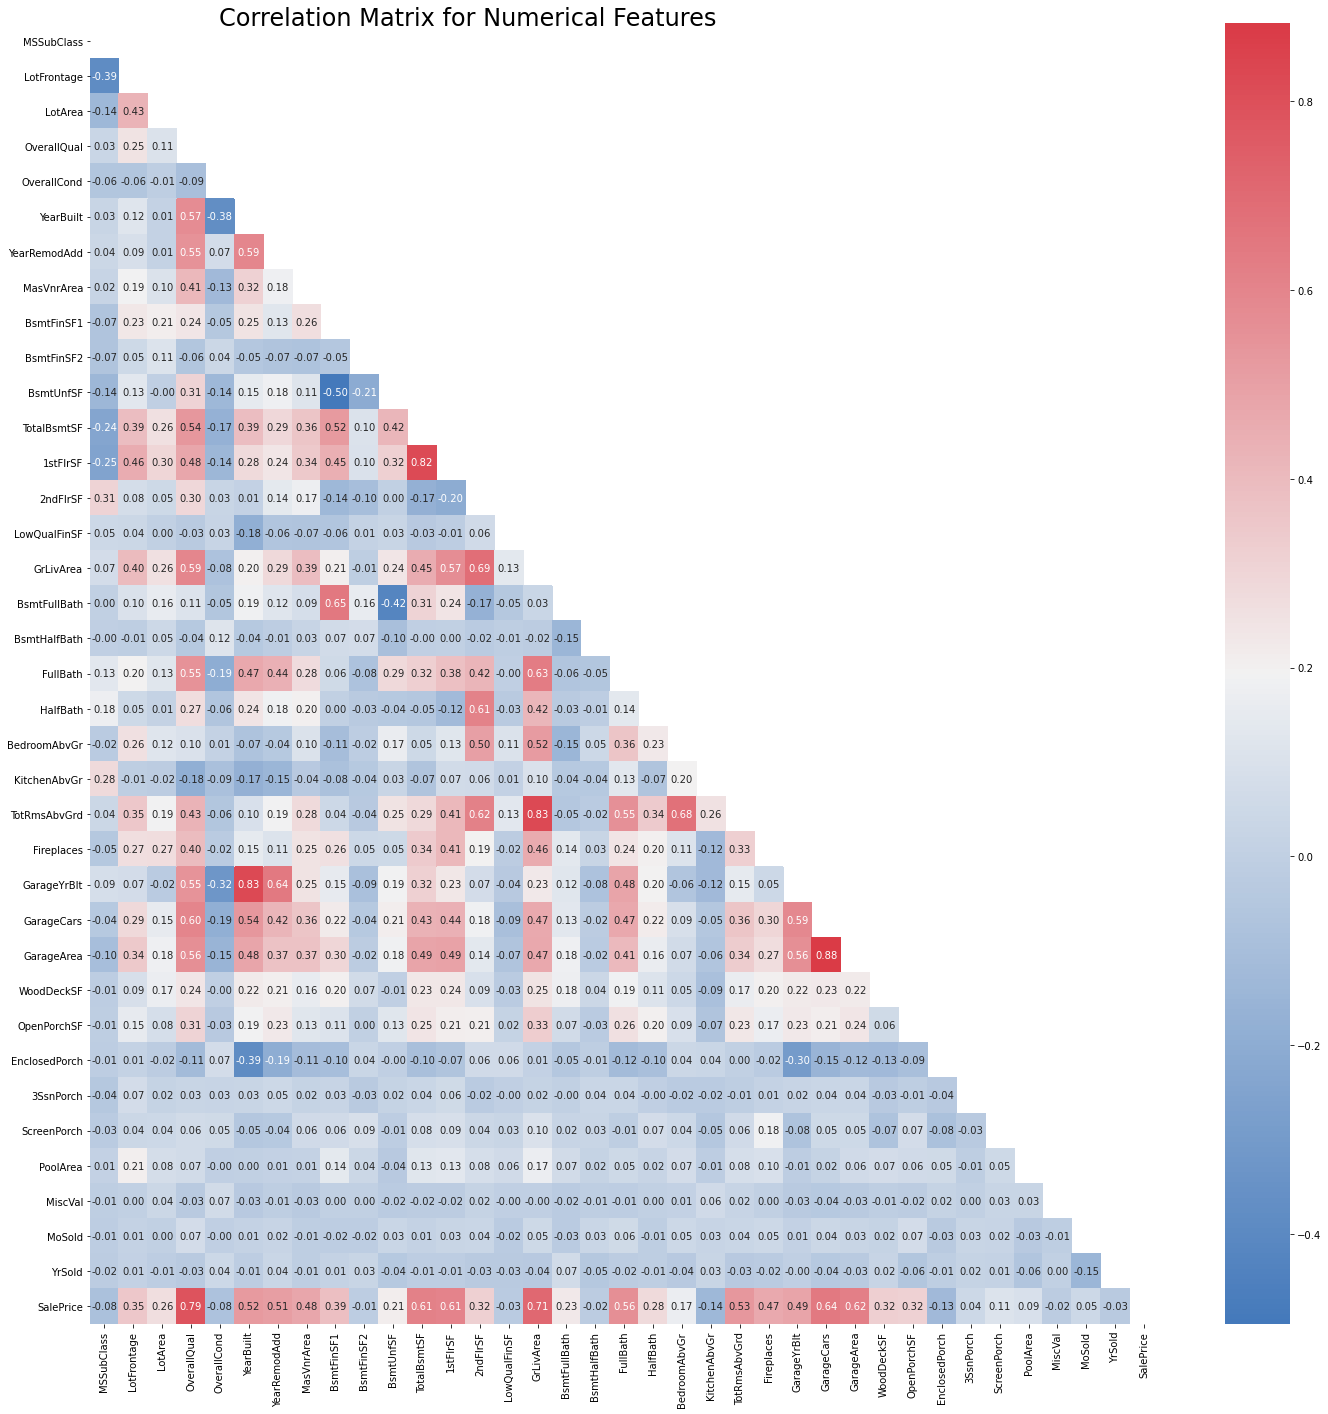

In [7]:
# Initial look at the correlation matrix between the numerical features of the dataset

corr_matrix = df_train.corr().drop('Id', axis=0).drop('Id', axis=1)

fig, ax = plt.subplots(figsize=(20, 20))
fig.suptitle('Correlation Matrix for Numerical Features', ha='right', fontsize=24)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, cmap=cmap, ax=ax)
fig.tight_layout()

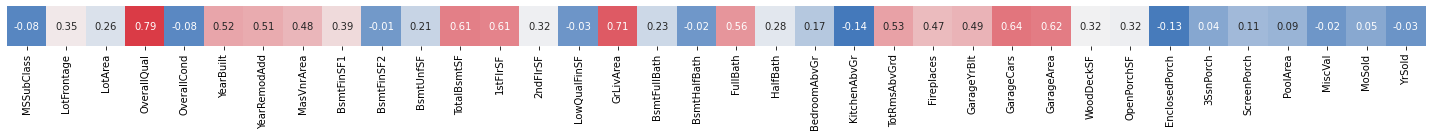

In [8]:
# Zooming on the correlation with the output variable (SalePrice)

corr_matrix = df_train.corr()
sale_corr = pd.DataFrame(corr_matrix['SalePrice']).drop(['SalePrice', 'Id'], axis=0).T

fig, ax = plt.subplots(figsize=(20,2))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(sale_corr, annot=True, fmt='.2f', cmap=cmap, ax=ax, cbar=False, yticklabels=False)
fig.tight_layout()

In [9]:
# Now getting a better sense of which features have the highest correlation with each other
# This can be relevant as we look into the possibility of reducing the feature set we use
# to estimate the SalePrice

threshold = 0.6

corr_matrix_tmp = corr_matrix.abs() \
    .drop(['Id', 'SalePrice'], axis=1) \
    .drop(['Id', 'SalePrice'], axis=0)
mask = np.zeros_like(corr_matrix_tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix_tmp = corr_matrix_tmp * mask
corr_matrix_tmp = corr_matrix_tmp

corr_vector = corr_matrix_tmp.unstack().sort_values(kind="quicksort", ascending=False)
corr_vector = pd.DataFrame(corr_vector[(corr_vector<1.0) & (corr_vector>threshold)], columns=['Correlation'])
corr_vector

Correlation
GarageArea   GarageCars       0.882475
GarageYrBlt  YearBuilt        0.825667
TotRmsAbvGrd GrLivArea        0.825489
1stFlrSF     TotalBsmtSF      0.819530
GrLivArea    2ndFlrSF         0.687501
TotRmsAbvGrd BedroomAbvGr     0.676620
BsmtFullBath BsmtFinSF1       0.649212
GarageYrBlt  YearRemodAdd     0.642277
FullBath     GrLivArea        0.630012
TotRmsAbvGrd 2ndFlrSF         0.616423
HalfBath     2ndFlrSF         0.609707
GarageCars   OverallQual      0.600671

# In-dept Analysis of the Data and Clean Up

Our initial step is an analysis of the data to get a better sense of what might be more helpful in solving our inference problem.  We will take a look at the different features available in the training dataset and understand how to use and manipulate them for best performance.

To analyze the data and clean it up, we'll follow this approach:

- Analysis of the output variable (SalePrice)
- Analysis and handling of missing data
- Conversion of categorical features using various approaches, including, but not limited to one-hot encoding
- Analysis of numerical features, detection of outliers and discussion of their relationship to SalePrice
- Feature scaling
- Feature selection (based on correlation analysis and other considerations)

In this process, we will have to consistently manipulate both the training and test dataset.  To accomplish that, we are going to merge the two datasets into a unified Pandas DataFramce (`full`), and introduce two boolean flags (`isTrain` and `isTest`) that allow us to distinguish the data in the analysis.

In [10]:
# We create a joint DataFrame (full) which can be used to consistently and
# simultaneously process both training and test data.
# We also add two new columns (isTrain and isTest) to keep track of where the
# data is originally coming from.

full = pd.concat([df_train, df_test], ignore_index=True)
full['isTrain'] = full['Id'].isin(df_train['Id'])
full['isTest'] = full['Id'].isin(df_test['Id'])

# Output Variable: SalePrice

We begin our exploratory data analysis by looking at the output variable (`SalePrice`).  We have already described it a few cells above.  Now, we proceed to visualize its density and distribution to evaluate the presence of useful patterns to factor in our transformations.

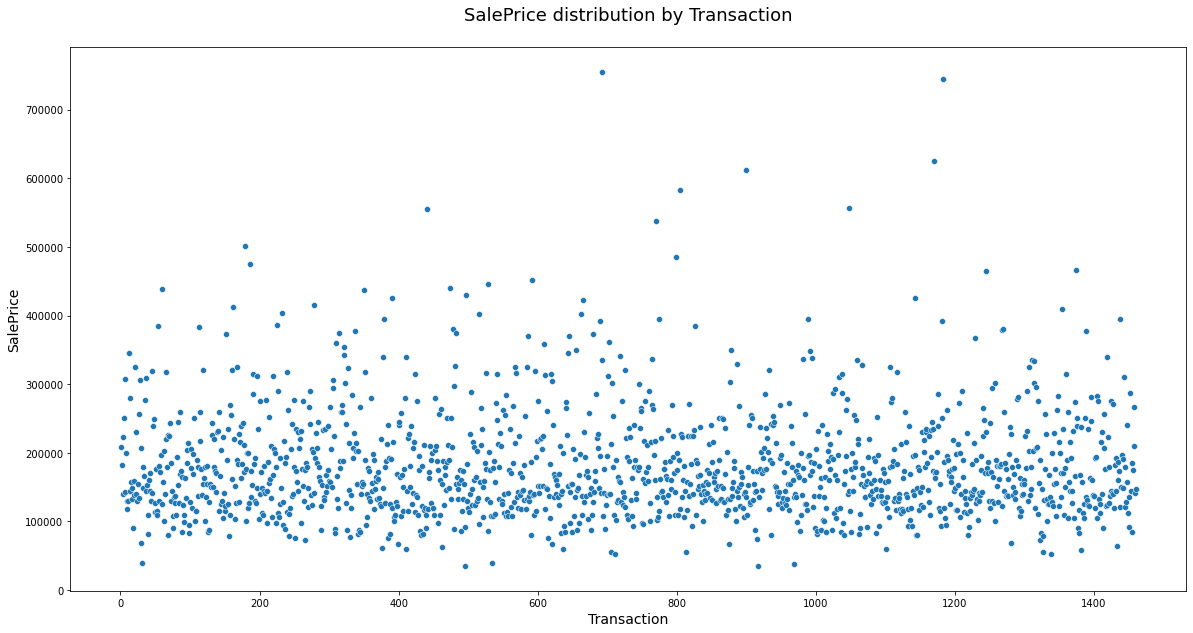

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('SalePrice distribution by Transaction\n', fontsize=18)
ax.set_ylabel('SalePrice', fontsize=14)
ax.set_xlabel('Transaction', fontsize=14)
sns.scatterplot(full[full['isTrain']]['Id'], full['SalePrice'])
plt.show()

The distribution of `SalePrice` by transaction shows the existence of two potential outlier in transactions above $700,000.

Next, we proceed to evaluate the density distribution of `SalePrice`. As we suspect some skewness in the data, we are going to compare how an unmodified distribution of `SalePrice` compare to one that has been logarithmically transformed.


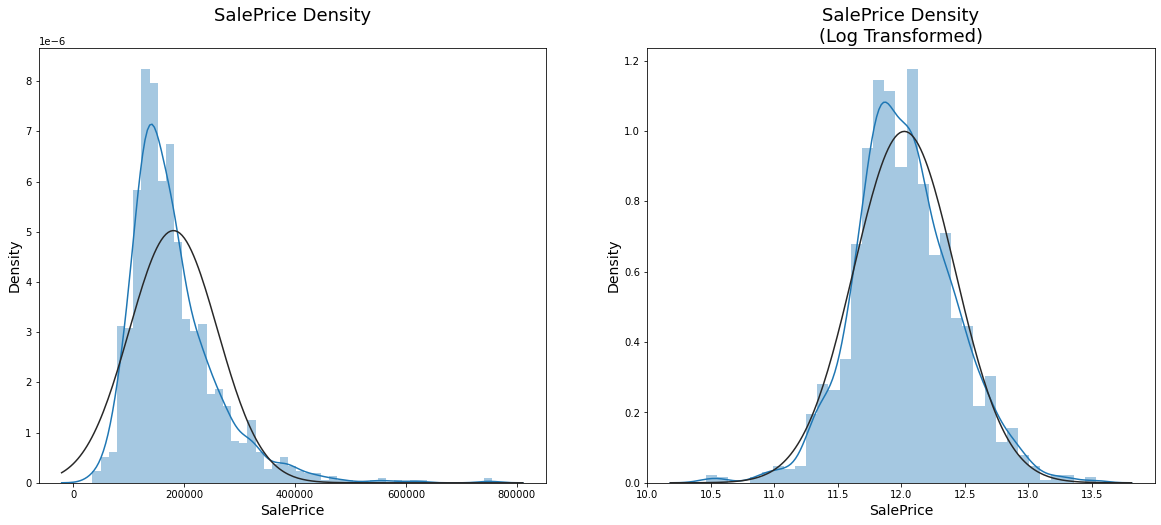

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].set_title('SalePrice Density\n', fontsize=18)
ax[0].set_ylabel('Density', fontsize=14)
ax[0].set_xlabel('SalePrice', fontsize=14)
sns.distplot(full['SalePrice'], fit=norm, ax=ax[0])
ax[1].set_title('SalePrice Density\n(Log Transformed)', fontsize=18)
ax[1].set_ylabel('Density', fontsize=14)
ax[1].set_xlabel('SalePrice (Log)', fontsize=14)
sns.distplot(np.log(full['SalePrice']), fit=norm, ax=ax[1])
plt.show()

Our intuition seems correct, and we can further validate that by taking a look at the value of skewness and kurtosis for the distribution.

In [13]:
# Checking skewness and kurtosis of the distribution of sale prices

saleprice_skewness = full['SalePrice'].skew()
saleprice_kurtosis = full['SalePrice'].kurt()

print(f'SalePrice Skewness: {saleprice_skewness:.6f}')
print(f'SalePrice Kurtosis: {saleprice_kurtosis:.6f}')


SalePrice Skewness: 1.882876
SalePrice Kurtosis: 6.536282


In summary, it looks like the output variable will benefit of a log transformation, which we plan to apply moving forward.  We have also identified two outliers, which will be removed later on, when we get to the analysis of the numerical input variables.

# Missing Data

Our first step in the analysis of the data is the evaluation of any missing data, and a strategy to handle that.

Let's first take a look to which variables have any missing data, and how frequent those occurrences are.

In [14]:
# Missing data in the dataset

total = full.drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent = (full.isna().sum()*100/full.isna().count()).sort_values(ascending=False)

total_train = full[full['isTrain']].drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent_train = (full[full['isTrain']].drop('SalePrice',1).isna().sum()*100/full[full['isTrain']].drop('SalePrice',1).isna().count()).sort_values(ascending=False)

total_test = full[full['isTest']].drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent_test = (full[full['isTest']].drop('SalePrice',1).isna().sum()*100/full[full['isTest']].drop('SalePrice',1).isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent, total_train, percent_train, total_test, percent_test], axis=1, 
                         keys=['Total', '%', 'Total (Train)', '% (Train)', 'Total (Test)', '% (Test)'])
missing_data = missing_data[missing_data['Total']>0]
missing_data.round(2)


Total      %  Total (Train)  % (Train)  Total (Test)  % (Test)
PoolQC        2909.0  99.66         1453.0      99.52        1456.0     99.79
MiscFeature   2814.0  96.40         1406.0      96.30        1408.0     96.50
Alley         2721.0  93.22         1369.0      93.77        1352.0     92.67
Fence         2348.0  80.44         1179.0      80.75        1169.0     80.12
FireplaceQu   1420.0  48.65          690.0      47.26         730.0     50.03
LotFrontage    486.0  16.65          259.0      17.74         227.0     15.56
GarageFinish   159.0   5.45           81.0       5.55          78.0      5.35
GarageYrBlt    159.0   5.45           81.0       5.55          78.0      5.35
GarageQual     159.0   5.45           81.0       5.55          78.0      5.35
GarageCond     159.0   5.45           81.0       5.55          78.0      5.35
GarageType     157.0   5.38           81.0       5.55          76.0      5.21
BsmtCond        82.0   2.81           37.0       2.53          45.0      3.08
BsmtExposure    82.0   2.81           38.0       2.60          44.0      3.02
BsmtQual        81.0   2.77           37.0       2.53          44.0      3.02
BsmtFinType2    80.0   2.74           38.0       2.60          42.0      2.88
BsmtFinType1    79.0   2.71           37.0       2.53          42.0      2.88
MasVnrType      24.0   0.82            8.0       0.55          16.0      1.10
MasVnrArea      23.0   0.79            8.0       0.55          15.0      1.03
MSZoning         4.0   0.14            0.0       0.00           4.0      0.27
BsmtFullBath     2.0   0.07            0.0       0.00           2.0      0.14
Utilities        2.0   0.07            0.0       0.00           2.0      0.14
Functional       2.0   0.07            0.0       0.00           2.0      0.14
BsmtHalfBath     2.0   0.07            0.0       0.00           2.0      0.14
BsmtUnfSF        1.0   0.03            0.0       0.00           1.0      0.07
GarageCars       1.0   0.03            0.0       0.00           1.0      0.07
BsmtFinSF1       1.0   0.03            0.0       0.00           1.0      0.07
SaleType         1.0   0.03            0.0       0.00           1.0      0.07
BsmtFinSF2       1.0   0.03            0.0       0.00           1.0      0.07
GarageArea       1.0   0.03            0.0       0.00           1.0      0.07
KitchenQual      1.0   0.03            0.0       0.00           1.0      0.07
TotalBsmtSF      1.0   0.03            0.0       0.00           1.0      0.07
Exterior2nd      1.0   0.03            0.0       0.00           1.0      0.07
Exterior1st      1.0   0.03            0.0       0.00           1.0      0.07
Electrical       1.0   0.03            1.0       0.07           0.0      0.00

There is clearly quite a good amount of missing data that needs to be taken care of.  For most of the variables above, we have performed a seprate analysis that has led us to implement the changes indicated in the function below.

In [15]:
def fill_missing(data):
    df = data.copy(deep=True)
    df['PoolQC'] = df['PoolQC'].fillna("NA")
    df['Fence'] = df['Fence'].fillna("NA")
    df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")
    df['BsmtExposure'] = df['BsmtExposure'].fillna("NA")
    df['BsmtQual'] = df['BsmtQual'].fillna("NA")
    df['BsmtCond'] = df['BsmtCond'].fillna("NA")
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NA")
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NA")
    df['KitchenQual'] = df['KitchenQual'].fillna("TA")
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['GarageCars'] = df['GarageCars'].fillna(0)
    df['GarageCond'] = df['GarageCond'].fillna("NA")
    df['GarageFinish'] = df['GarageFinish'].fillna("NA")
    df['GarageQual'] = df['GarageQual'].fillna("NA")
    df['GarageType'] = df['GarageType'].fillna("NA")
    df['Electrical'] = df['Electrical'].fillna("Mix")
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['MasVnrType'] = df['MasVnrType'].fillna("None")
    df['Utilities'] = df['Utilities'].fillna("AllPub")
    df['Functional'] = df['Functional'].fillna("Typ")
    df['Condition1'] = df['Condition1'].fillna("Normal")
    df['Condition2'] = df['Condition2'].fillna("Normal")
    df['Alley'] = df['Alley'].fillna("NA")

    return df

In [16]:
full = fill_missing(full)

These changes are quite straightforward as they basically involve the filling of missing data with a predetermined value.  There are other variables where we did not deem this to be a proper approach.  We are now going to take a more specific look at these variables and how we handle them.

### LotFrontage

This feature represents the *linear feet of street connected to property*. Since it does have a pretty high correlation with the SalePrice, we have to consider it seriously before potentially deciding to drop it.

The first thing we can do is see if there are other features in the dataset that might be correlated to `LotFrontage` and could be used to infer its value.

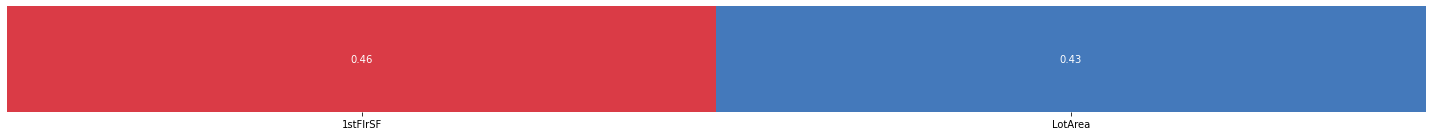

In [17]:
threshold = 0.45
corr_matrix = full[full['isTrain']].corr().drop('Id', axis=0).drop('Id', axis=1)

lot_frontage_corr = pd.DataFrame(corr_matrix['LotFrontage']).drop(['SalePrice','LotFrontage'])
k = len([i for i in corr_matrix['LotFrontage'] if abs(i) >= threshold])
lot_frontage_corr_features = lot_frontage_corr.nlargest(k, 'LotFrontage').T

fig, ax = plt.subplots(figsize=(20,2))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(lot_frontage_corr_features, annot=True, fmt='.2f', cmap=cmap, ax=ax, cbar=False, yticklabels=False)
fig.tight_layout()

The variable `LotArea` seems to be the one with the highest level of correlation to `LotFrontage`.  We can explore the type of relationship between this two variables by drawing a two-dimensional scatter plot diagram of them with and without a log transformation.

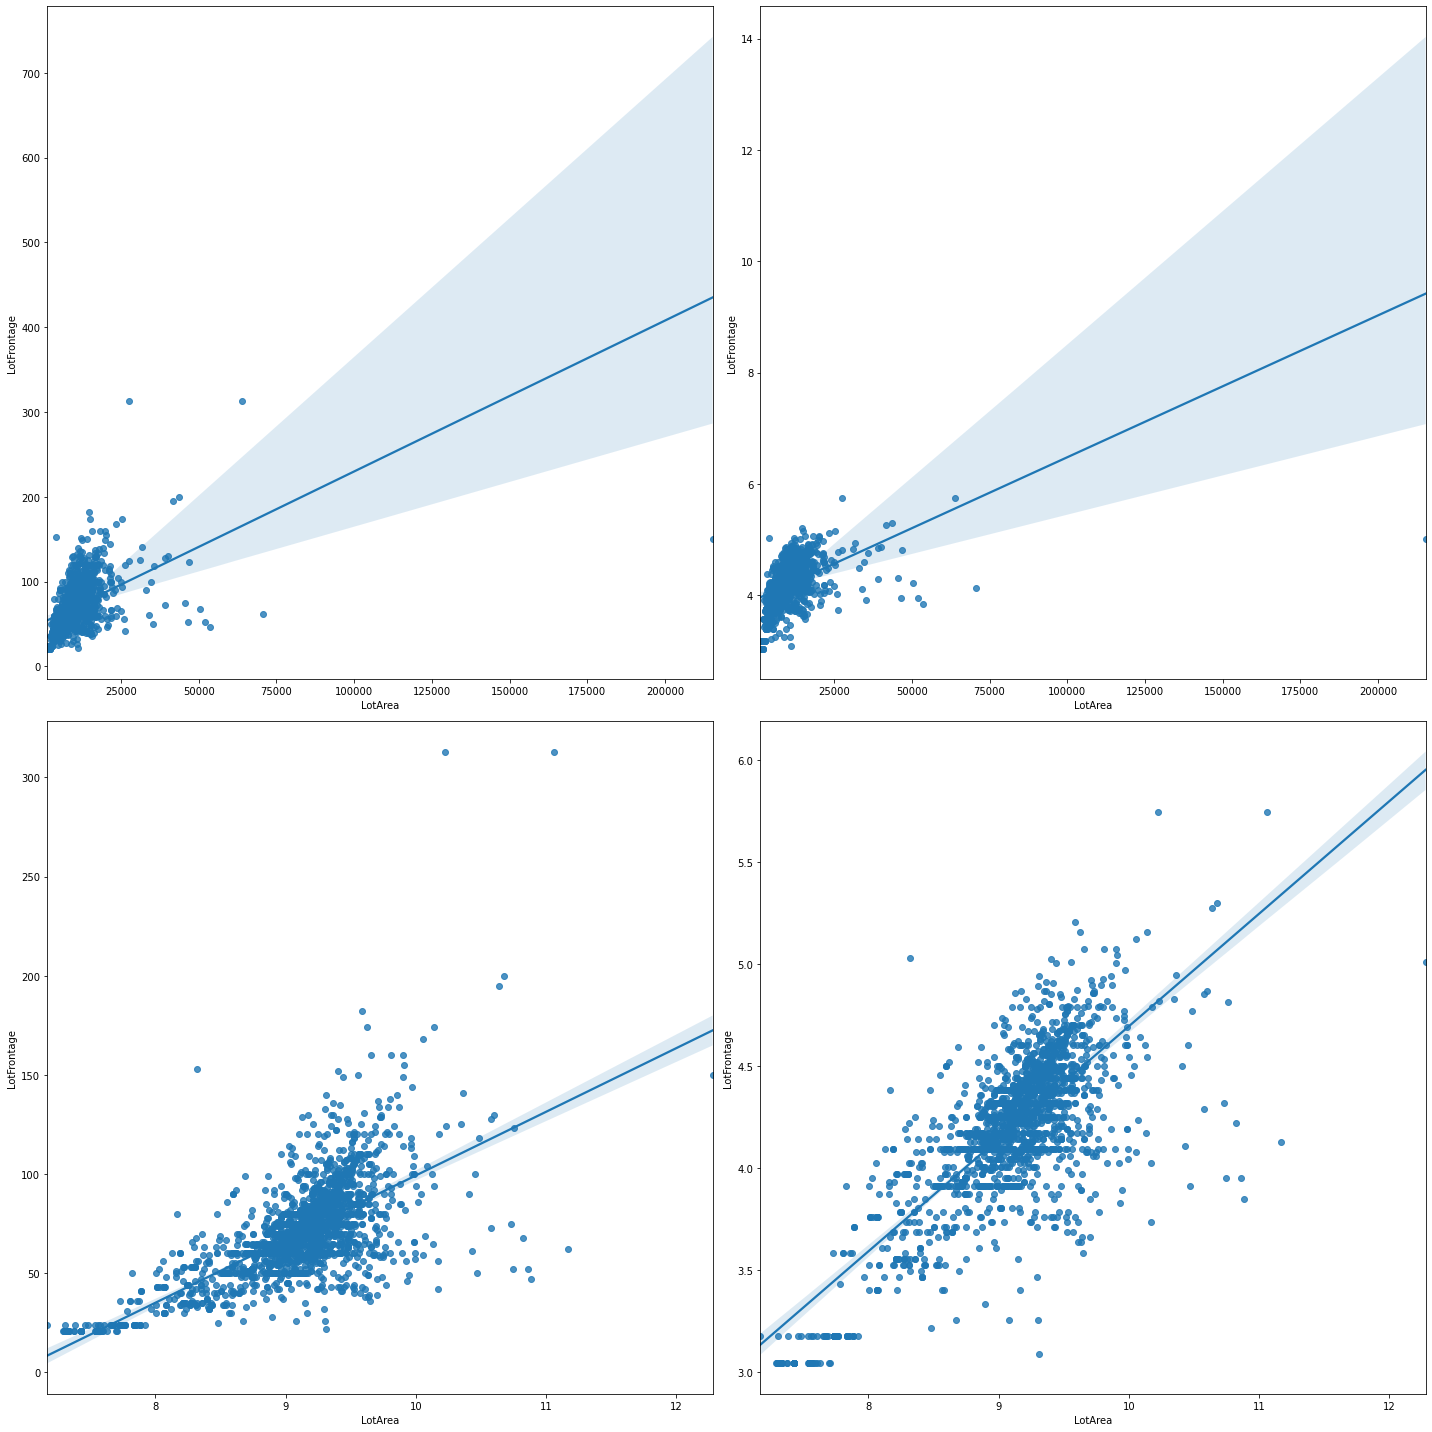

In [18]:
fig, axes = plt.subplots(2,2, figsize=(20,20))

sns.regplot(full['LotArea'], full['LotFrontage'], ax=axes[0,0])
sns.regplot(full['LotArea'], np.log(full['LotFrontage']), ax=axes[0,1])
sns.regplot(np.log(full['LotArea']), full['LotFrontage'], ax=axes[1,0])
sns.regplot(np.log(full['LotArea']), np.log(full['LotFrontage']), ax=axes[1,1])
fig.tight_layout()

It looks like the relationship between `LotFrontage` and `LotArea` is best modeled by a linear regression that transforms both the input and output variables with a logarithmic function.

To address our original need of finding missing values for `LotFrontage`, we will use a linear regression model.

In [19]:
missing_mask = full['LotFrontage'].isna()
filled_mask  = full['LotFrontage'].notna()
predict = full[missing_mask]
train = full[filled_mask]

X_train = np.array(np.log(train['LotArea'])).reshape(-1,1)
y_train = np.array(np.log(train['LotFrontage']))
X_predict = np.array(predict['LotArea']).reshape(-1,1)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_predict = model.predict(np.log(X_predict))

full['LotFrontage'][missing_mask] = np.exp(y_predict)

### GarageYrBlt

This feature represents the year when the garage was built, and as expected, it is highly correlated with the year the house was built (`YearBuilt`) and the year the house was remodeled (`YearRemodAdd`).  In light of that, we will use the most recent of those to fill in the missing values.

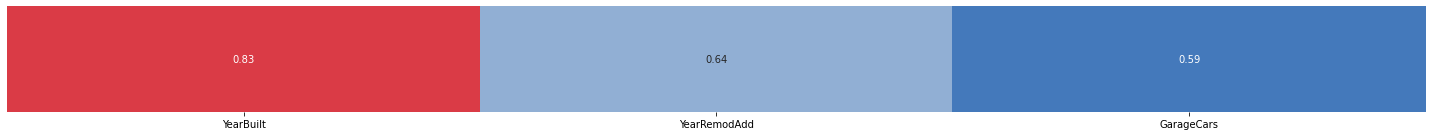

In [20]:
threshold = 0.6

garage_yr_blt_corr = pd.DataFrame(corr_matrix['GarageYrBlt']).drop('SalePrice').drop('GarageYrBlt')
k = len([i for i in corr_matrix['GarageYrBlt'] if abs(i) >= threshold])
garage_yr_blt_corr_features = garage_yr_blt_corr.nlargest(k, 'GarageYrBlt').T

fig, ax = plt.subplots(figsize=(20,2))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(garage_yr_blt_corr_features, annot=True, fmt='.2f', cmap=cmap, ax=ax, cbar=False, yticklabels=False)
fig.tight_layout()

In [21]:
full['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [22]:
full[((full['GarageYrBlt'].isna()) & ((full['GarageCars']!=0) | (full['GarageArea']!=0)))].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2126  2127          60       RM         57.0     8094   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2126         Lvl    AllPub    Inside       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2126       Norm   2fmCon     2.5Unf            6            8       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2126          1983     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2126         0.0        TA        TA      PConc       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2126           Mn          Rec       196.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2126     1046.0       1242.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2126      1242       742             0       1984           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2126         2         0             5             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2126             8        Typ           0          NA     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2126           NA         1.0       360.0         NA         NA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2126          64            0            180          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2126         0     NA  MnPrv        Shed     1000       9    2008       WD   

     SaleCondition  SalePrice  isTrain  isTest  
2126        Normal        NaN    False    True

In [23]:
temp_data = full.iloc[2576]
temp_data['GarageCars'] = 0.0
temp_data['GarageArea'] = 0.0
full.iloc[2576] = temp_data

In [24]:
temp_df = full[full['GarageYrBlt'].isna()]
temp_df['GarageYrBlt'] = temp_df['YearRemodAdd']
full[full['GarageYrBlt'].isna()] = temp_df

The analysis of the values of the variable `GarageYrBlt` shows that some of the data may not be reliable as there is at least one record that correspond to the max value of the variable and is clearly outside of the range of years that are possible (i.e. 2207).  As a matter of fact, since we know that the latest transaction recorded in the dataset is from 2010, any value of `GarageYrBlt` larger than that is probably a value that has been miscoded.  The simplest way to handle those is going to be by resetting them to the same year of the remodeling of the house, which is consistent with the approach above.

In [25]:
full[full.GarageYrBlt>2010]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2592  2593          20       RL         68.0     8298   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2592         HLS    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2592       Norm     1Fam     1Story            8            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2592          2007       Hip  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2592         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2592           Av          GLQ       583.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2592      963.0       1546.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2592      1564         0             0       1564           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2592         2         0             2             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
2592             6        Typ           1          Gd     Attchd       2207.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
2592          RFn         2.0       502.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
2592         132            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
2592         0     NA    NA         NaN        0       9    2007      New   

     SaleCondition  SalePrice  isTrain  isTest  
2592       Partial        NaN    False    True

In [26]:
full.at[2592, 'GarageYrBlt'] = full.at[2592, 'YearRemodAdd']

In [27]:
full.loc[2592]['GarageYrBlt']

2007.0

### MiscFeature and MiscVal

The column `MiscFeature` refers to a general collection of miscellaneous features that have been recorded for some of the properties.  It's a fairly sparse variable, so we doubt it plays a significant role in the prediction of the sale price, but we are still going to handle it properly as it may become more relevant in the event more data becomes available.

To handle this feature, we are going to do two things and combine information from the `MiscVal` feature.  Specifically:
1. We are creating a new variable for each possible unique value of MiscFeature
2. We are associating the value of miscellaneaous features (as recorded in `MiscVal`) to the new feature

In [28]:
add_categorical = ['Othr', 'TenC', 'Gar2', 'Shed']
for column in add_categorical:
    data = full['MiscVal'][full['MiscFeature'] == column]
    full[column] = pd.Series(data, index = full.index).fillna(value=0)
full.drop(columns = ['MiscFeature'], inplace = True)
# full.drop(columns = ['MiscVal'], inplace = True)

## Missing Data Check

As we are now done pre-processing data and features, let's make sure there are no more missing data left.

In [29]:
# Missing data in the dataset

total = full.drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent = (full.isna().sum()/full.isna().count()).sort_values(ascending=False)

total_train = full[full['isTrain']].drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent_train = (full[full['isTrain']].drop('SalePrice',1).isna().sum()/full[full['isTrain']].drop('SalePrice',1).isna().count()).sort_values(ascending=False)

total_test = full[full['isTest']].drop('SalePrice',1).isna().sum().sort_values(ascending=False)
percent_test = (full[full['isTest']].drop('SalePrice',1).isna().sum()/full[full['isTest']].drop('SalePrice',1).isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent, total_train, percent_train, total_test, percent_test], axis=1, 
                         keys=['Total', '%', 'Total (Train)', '% (Train)', 'Total (Test)', '% (Test)'])
missing_data[missing_data['Total']>0].head(20)

Total         %  Total (Train)  % (Train)  Total (Test)  % (Test)
MSZoning       4.0  0.001370            0.0        0.0           4.0  0.002742
Exterior1st    1.0  0.000343            0.0        0.0           1.0  0.000685
Exterior2nd    1.0  0.000343            0.0        0.0           1.0  0.000685
SaleType       1.0  0.000343            0.0        0.0           1.0  0.000685

We are almost done.  For the remaining variables that are still missing, we'll use one-hot encoding, which is going to take care of the missing value

# Categorical Features

Before proceeding with more in-depth feature analysis, we are going to convert all categorical features using one-hot encoding, so that we can analyze each derived feature independently.  This is going to make the number of features explode and we'll have to select the relevant ones for our analysis later.

In [30]:
def get_features (data, mode='correlation', threshold=0.0, keepId=False):
    if mode == 'numerical':
        n_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numerical = data.select_dtypes(include=n_types).drop('Id', 1).drop('SalePrice', 1)
        features = numerical.columns
    elif mode == 'correlation':
        corr_vector = data.corr()['SalePrice'].abs().sort_values(ascending=False).drop(['SalePrice','Id'])
        features = corr_vector[corr_vector > threshold].index
    elif mode == 'categorical':
        c_types = ['object']
        categorical = data.select_dtypes(include=c_types)
        features = categorical.columns
    elif mode == 'all':
        features = data.columns.drop(['SalePrice','Id','isTrain','isTest'])
    else:
        print('Not a valid mode')
        return
    features=list(features)
    if keepId:
        features.append('Id')
    return features


In [31]:
categorical_features = get_features(full, mode='categorical')
print (categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [32]:
numerical_features = get_features(full, mode='numerical')
print (numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Othr', 'TenC', 'Gar2', 'Shed']


In [33]:
all_features = get_features(full, mode='all')
print (all_features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [34]:
hi_corr_features = get_features(full, mode='correlation', threshold=0.15)
print(hi_corr_features)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr']


## Neighborhood

As expected, the neighborhood is a very important feature in the data set ("*location, location, location!*") and we have decided to convert the information about the name of the neighborhood to the median price of houses sold in that neighborhood.  This creates some sort of ranking amongst neighborhood that has a very nice log-log correlation with the sale price.

In [35]:
median_df = full.groupby(['Neighborhood'])['SalePrice'].median().to_frame(name='NeighborhoodPrice').reset_index()
full = full.merge(median_df,on='Neighborhood',how='left').drop(['Neighborhood'],axis=1)

In [36]:
full['NeighborhoodPrice'] = np.log(full['NeighborhoodPrice'])

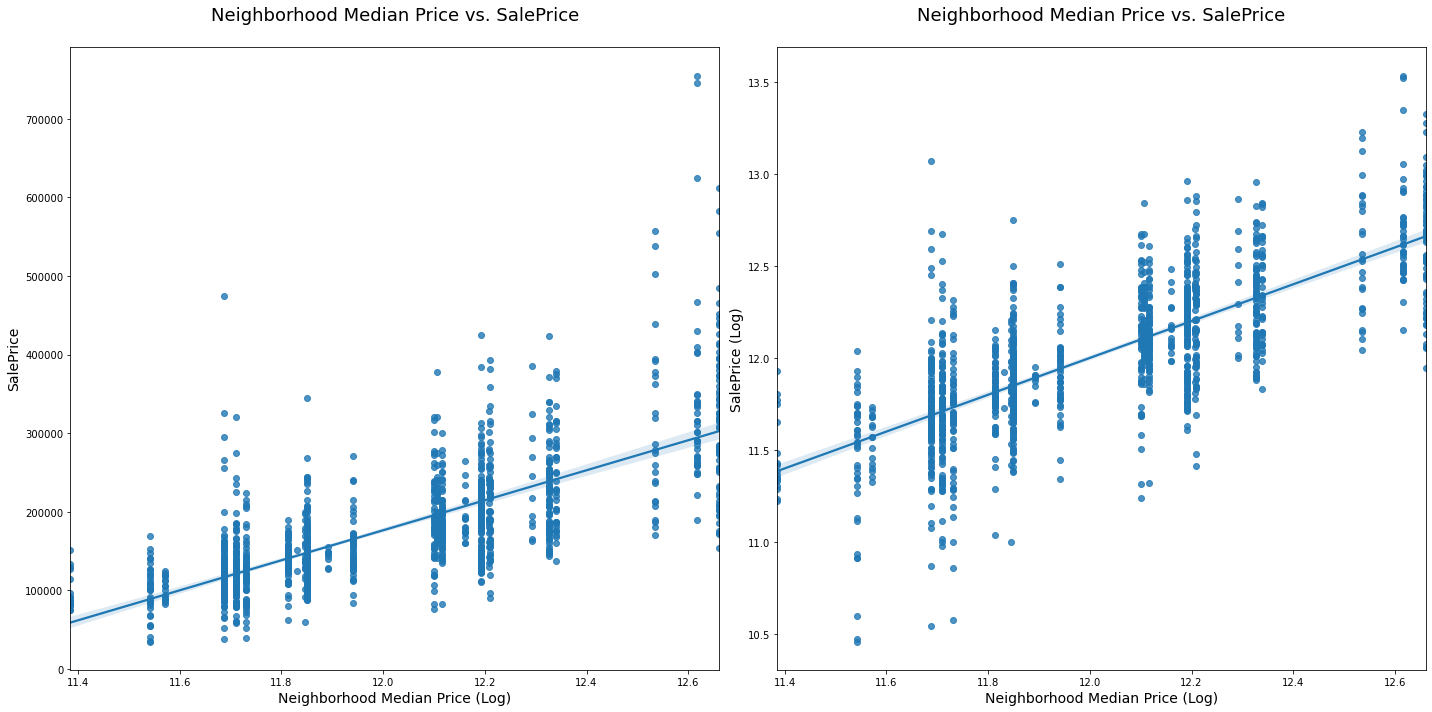

In [37]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.regplot(full['NeighborhoodPrice'], full['SalePrice'], ax=axes[0])
sns.regplot(full['NeighborhoodPrice'], np.log(full['SalePrice']), ax=axes[1])
axes[0].set_title('Neighborhood Median Price vs. SalePrice\n', fontsize=18)
axes[0].set_ylabel('SalePrice', fontsize=14)
axes[0].set_xlabel('Neighborhood Median Price (Log)', fontsize=14)
axes[1].set_title('Neighborhood Median Price vs. SalePrice\n', fontsize=18)
axes[1].set_ylabel('SalePrice (Log)', fontsize=14)
axes[1].set_xlabel('Neighborhood Median Price (Log)', fontsize=14)

fig.tight_layout()

## Year and Month of Sale

These two features could be quite relevant in measuring the impact of season (month) on the sale as well as factoring the potential impact of price fluctuations over the year due to inflation or other factors influencing the market.  We will encode and treat them accordingly, but in reality, there is not enough data in the dataset to infer any significant conclusion on any of the above points (the range of transactions is very close in time).

In [38]:
month_dummies = pd.get_dummies(full['MoSold']).rename(columns={
    1 : 'Sold_Jan',
    2 : 'Sold_Feb',
    3 : 'Sold_Mar',
    4 : 'Sold_Apr',
    5 : 'Sold_May',
    6 : 'Sold_Jun',
    7 : 'Sold_Jul',
    8 : 'Sold_Aug',
    9 : 'Sold_Sep',
    10 : 'Sold_Oct',
    11 : 'Sold_Nov',
    12 : 'Sold_Dec'
})
full = pd.concat([full, month_dummies], axis=1).drop('MoSold', axis=1)

In [39]:
full['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [40]:
year_dummies = pd.get_dummies(full['YrSold']).rename(columns={
    2006 : 'Sold_2006',
    2007 : 'Sold_2007',
    2008 : 'Sold_2008',
    2009 : 'Sold_2009',
    2010 : 'Sold_2010'
})
full = pd.concat([full, year_dummies], axis=1).drop('YrSold', axis=1)

## MSSubClass

This feature, that represent *the type of dwelling involved in the sale* needs to be converted from being a numerical feature to becoming a categorical one with a one-hot encoding.

In [41]:
full['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [42]:
subclass_dummies = pd.get_dummies(full['MSSubClass']).rename(columns={
    20 : 'MSSub_20',
    30 : 'MSSub_30',
    40 : 'MSSub_40',
    45 : 'MSSub_45',
    50 : 'MSSub_50',
    60 : 'MSSub_60',
    70 : 'MSSub_70',
    75 : 'MSSub_75',
    80 : 'MSSub_80',
    85 : 'MSSub_85',
    90 : 'MSSub_90',
    120 : 'MSSub_120',
    150 : 'MSSub_150',
    160 : 'MSSub_160',
    180 : 'MSSub_180',
    190 : 'MSSub_190'
})
full = pd.concat([full, subclass_dummies], axis=1).drop('MSSubClass', axis=1)

## Age Features

One issue with regression problem is the scale of the variables being used.  We are going to look at standardization and feature scaling later, but in the case of features that represent a date (e.g. a year), it's always good practice to convert them to an age, which is going to have smaller values.  In doing this, we should take into account the fact that the dates of the transactions in the dataset are all anterior to 2011, so for our analysis and for the data available in the dataset (both train and test), we can safely build age features as the distance from 2011.

In [43]:
full['GarageAge'] = full['GarageYrBlt'].apply(lambda year : 2011 - year)
full['RemodelAge'] = full['YearRemodAdd'].apply(lambda year : 2011 - year)
full['HouseAge'] = full['YearBuilt'].apply(lambda year : 2011 - year)

full.drop(['GarageYrBlt', 'YearRemodAdd', 'YearBuilt'], axis=1, inplace=True)

## New Features

We are almost done with the categorical features, but there is one more thing that we thought imporant to do and which is going to help in preserving information when we proceed with scaling values of features that are too big.  This has to do with the introduction of boolean features to indicate whether or not a certain feature exist in a given house.

These features are effectively modeling the fact that a house has a pool, a garage, a deck, a porch, a basement or a second floor.

We are also creating a new feature (`TotalPorchSF`) that adds up the square footage of all different kind of porch that could be present in a house.

In [44]:
full['Pool'] = full['PoolArea'].apply(lambda x: x != 0).map({True: 1, False: 0})
full['Garage'] = full['GarageArea'].apply(lambda x: x != 0).map({True: 1, False: 0})
full['Deck'] = full['WoodDeckSF'].apply(lambda x: x != 0).map({True: 1, False: 0})
full['Basement'] = full['TotalBsmtSF'].apply(lambda x: x != 0).map({True: 1, False: 0})
full['2ndFloor'] = full['2ndFlrSF'].apply(lambda x: x != 0).map({True: 1, False: 0})
full['TotalPorchSF'] = full['OpenPorchSF']+full['EnclosedPorch']+full['3SsnPorch']+full['ScreenPorch']
full['Porch'] = full['TotalPorchSF'].apply(lambda x: x != 0).map({True: 1, False: 0})


## Other Categorical Features

Lastly, we are left with features that can be converted using one-hot encoding.  It should be noted that some of them could have been converted using an ordinal scale (e.g. features describing the quality or condition of certain portions of the property).  While we considered that and, given mroe time, it might be useful to do more research and understand if a proper ranking could be created, at this stage we felt that we don't have enough information to translate those seemingly ordinal features into numerically ranked ones.  In other words, we did not feel we know enough to decide whether a kitchen in good state should be a 3 or a 5 and whether one in excellent state should simply be 1 or 2 bigger than that or maybe tenfold more.

In [45]:
# One-hot encoding for categorical features

full = pd.get_dummies(full)

In [46]:
# Let's take another look at what the dataset looks like after having taken care
# of missing values and categorical features:

full.shape

(2919, 318)

# Numerical Features

As we proceed with our analysis, we now move to review numerical features.  For these, we are interested in assessing at least two things:

- The relationship with the output variable (`SalePrice`) and any potential transformations that could improve the performance of the model
- The existence of outliers that could skew the final results and performance of the model

As a starting point, we are going to plot the distribution of `SalePrice` for each of the numerical features.


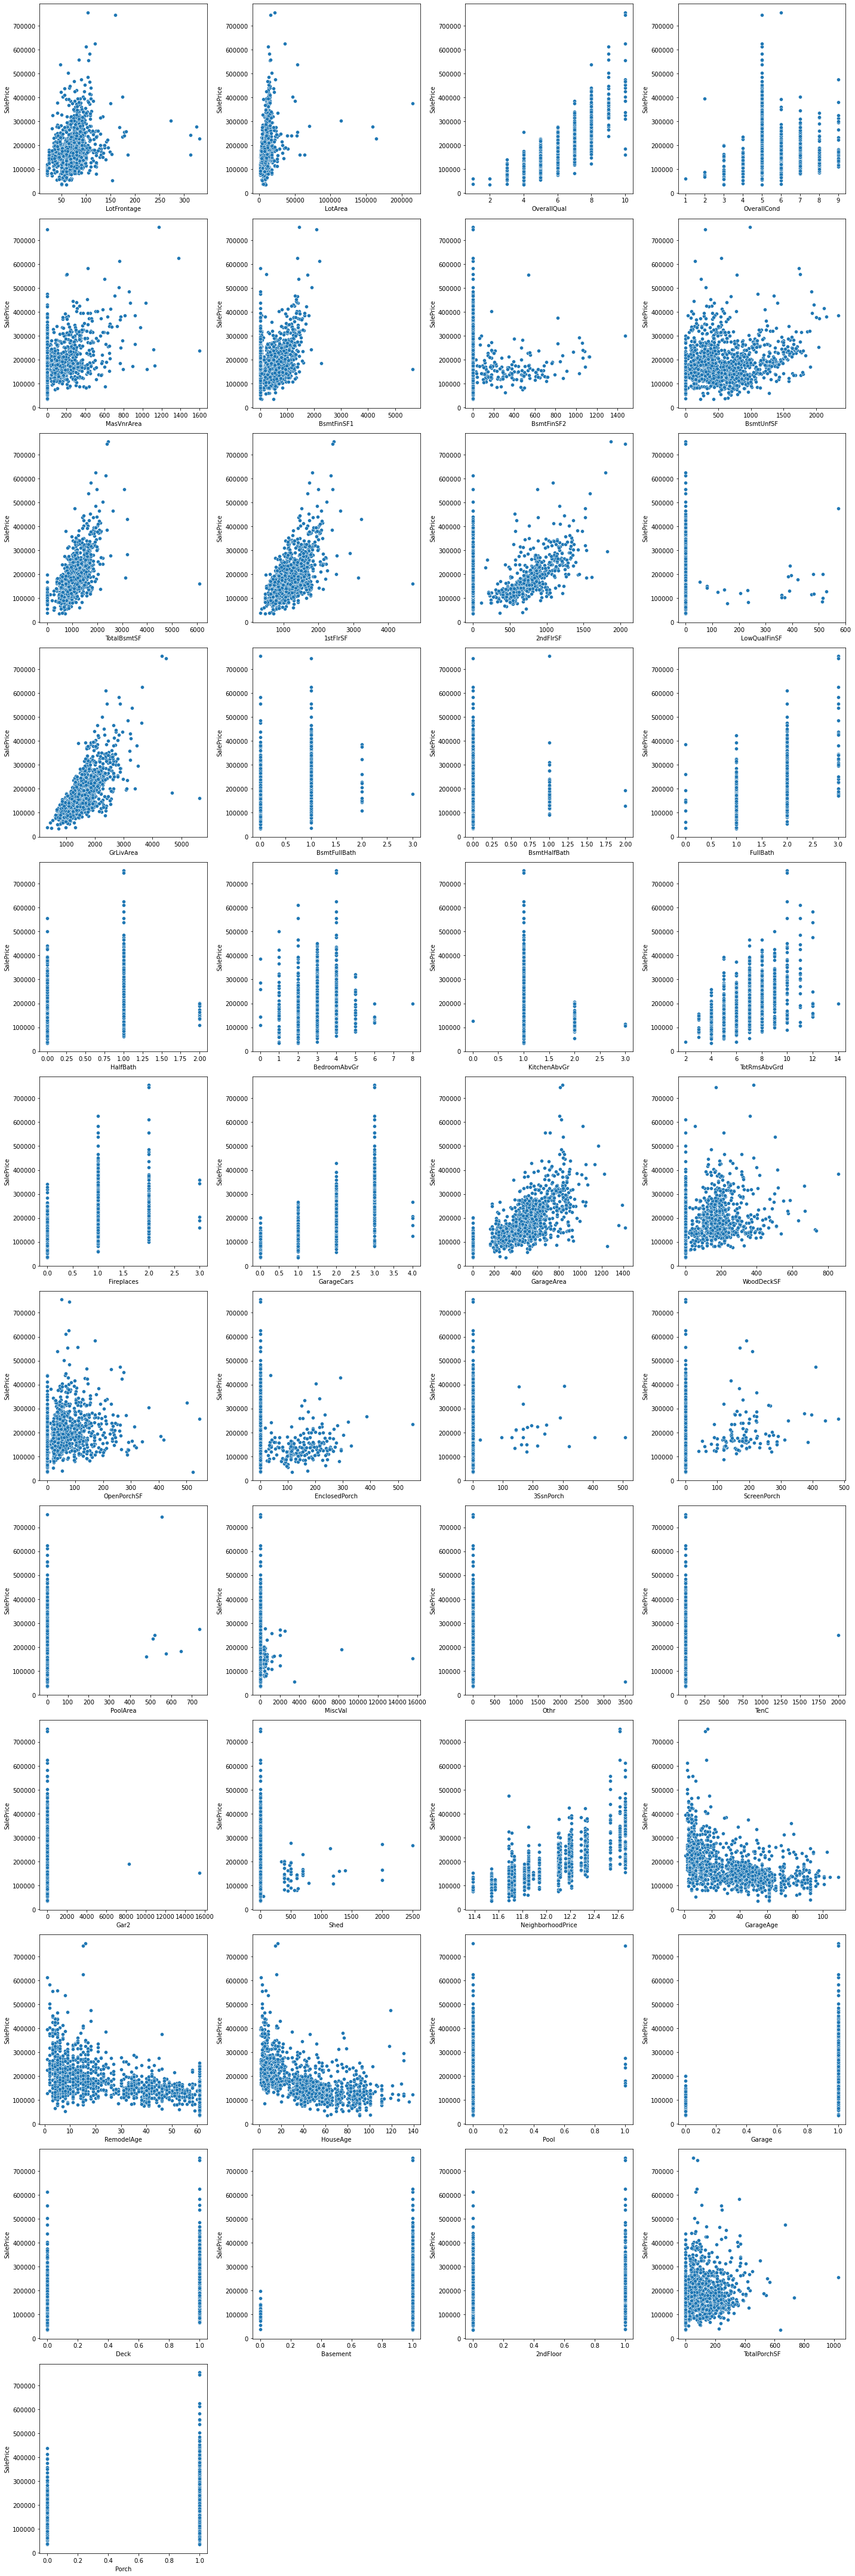

In [47]:
numerical_features = get_features(full, mode='numerical')
total_features = len(numerical_features)

data = full[full['isTrain']]

x_plot = 4
y_plot = int(total_features/x_plot)+1

x_size = 20
y_size = y_plot * 5

fig, ax = plt.subplots(y_plot, x_plot, figsize=(x_size, y_size))

for y in range (y_plot):
    for x in range (x_plot):
        if y*x_plot+x < total_features:
            current_feature = numerical_features[y*x_plot+x]
            sns.scatterplot(data[current_feature], data['SalePrice'], ax=ax[y][x])
        else:
            ax[y][x].axis("off")
        
fig.tight_layout()


## Cleaning Up Outliers

The distribution of SalePrice by feature gives us a pretty clear view of where the outliers are.  By visually observing the graphs above (and larger versions, which we are omitting from this Notebook, but could be easily reproduced), we have decided to perform the clean up of outliers described in the cell below.

In [48]:
clean_train = full[full['isTrain']]
clean_test = full[full['isTest']]
clean_train = clean_train.drop(clean_train[(clean_train['SalePrice'] >= 700000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['LotFrontage'] >= 200)].index)
clean_train = clean_train.drop(clean_train[(clean_train['LotArea'] >= 100000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallQual'] == 4) & (clean_train['SalePrice'] > 200000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallQual'] == 8) & (clean_train['SalePrice'] > 500000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallQual'] == 10) & (clean_train['SalePrice'] < 300000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallCond'] == 2) & (clean_train['SalePrice'] > 300000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallCond'] == 5) & (clean_train['SalePrice'] > 700000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OverallCond'] == 6) & (clean_train['SalePrice'] > 700000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['MasVnrArea'] >= 1200)].index)
clean_train = clean_train.drop(clean_train[(clean_train['BsmtFinSF1'] >= 3000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['BsmtFinSF2'] >= 1200)].index)
clean_train = clean_train.drop(clean_train[(clean_train['TotalBsmtSF'] >= 4000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['1stFlrSF'] >= 4000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['LowQualFinSF'] > 500) & (clean_train['SalePrice'] > 400000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['GrLivArea'] >= 4000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['BedroomAbvGr'] >= 7)].index)
clean_train = clean_train.drop(clean_train[(clean_train['BedroomAbvGr'] == 2) & (clean_train['SalePrice'] > 500000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['KitchenAbvGr'] < 1)].index)
clean_train = clean_train.drop(clean_train[(clean_train['TotRmsAbvGrd'] > 12)].index)
clean_train = clean_train.drop(clean_train[(clean_train['Fireplaces'] > 2)].index)
clean_train = clean_train.drop(clean_train[(clean_train['GarageCars'] > 3)].index)
clean_train = clean_train.drop(clean_train[(clean_train['GarageArea'] > 1200) & (clean_train['SalePrice'] < 300000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['WoodDeckSF'] > 700)].index)
clean_train = clean_train.drop(clean_train[(clean_train['OpenPorchSF'] > 450)].index)
clean_train = clean_train.drop(clean_train[(clean_train['EnclosedPorch'] > 450)].index)
clean_train = clean_train.drop(clean_train[(clean_train['3SsnPorch'] > 350)].index)
clean_train = clean_train.drop(clean_train[(clean_train['ScreenPorch'] > 100) & (clean_train['SalePrice'] > 500000)].index)
clean_train = clean_train.drop(clean_train[(clean_train['HouseAge'] >= 111) & (clean_train['SalePrice'] > 200000)].index)
full = pd.concat([clean_train, clean_test], ignore_index=True)


In [49]:
# Let's take a look at the new shape of the `full` dataset

print (full.shape)

(2877, 318)


In [50]:
# Here is the new set of columns (features) for the combined dataset

all_features = get_features(full, mode='all')
print (all_features)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Othr', 'TenC', 'Gar2', 'Shed', 'NeighborhoodPrice', 'Sold_Jan', 'Sold_Feb', 'Sold_Mar', 'Sold_Apr', 'Sold_May', 'Sold_Jun', 'Sold_Jul', 'Sold_Aug', 'Sold_Sep', 'Sold_Oct', 'Sold_Nov', 'Sold_Dec', 'Sold_2006', 'Sold_2007', 'Sold_2008', 'Sold_2009', 'Sold_2010', 'MSSub_20', 'MSSub_30', 'MSSub_40', 'MSSub_45', 'MSSub_50', 'MSSub_60', 'MSSub_70', 'MSSub_75', 'MSSub_80', 'MSSub_85', 'MSSub_90', 'MSSub_120', 'MSSub_150', 'MSSub_160', 'MSSub_180', 'MSSub_190', 'GarageAge', 'RemodelAge', 'HouseAge', 'Pool', 'Garage', 'Deck', 'Basement', '2ndFloor', 'TotalPorchSF', 'Porch', 'MSZ

In [51]:
# This is the set of features that are numerical after all the transformations done above

numerical_features = get_features(full, mode='numerical')
print(numerical_features)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Othr', 'TenC', 'Gar2', 'Shed', 'NeighborhoodPrice', 'GarageAge', 'RemodelAge', 'HouseAge', 'Pool', 'Garage', 'Deck', 'Basement', '2ndFloor', 'TotalPorchSF', 'Porch']


In [52]:
# This is an example of how we can extract a subset of features from the dataset, limiting the list to
# only those that have a minimum level of correlation (threshold) to the sale price

hi_corr_features = get_features(full, mode='correlation', threshold=0.45)
print(hi_corr_features)

['OverallQual', 'NeighborhoodPrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'ExterQual_TA', '1stFlrSF', 'HouseAge', 'FullBath', 'BsmtQual_Ex', 'KitchenQual_TA', 'Foundation_PConc', 'RemodelAge', 'TotRmsAbvGrd', 'GarageAge', 'ExterQual_Gd', 'FireplaceQu_NA', 'BsmtQual_TA', 'KitchenQual_Ex', 'MasVnrArea', 'HeatingQC_Ex', 'Fireplaces', 'BsmtFinType1_GLQ']


In [53]:
# Some numerical features will need to be reviewed and analyzed to understand if transformation might be necessary
# or helpful.  Here is the list that we chose to consider

numerical_to_review = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                       'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                       'EnclosedPorch', 'ScreenPorch', 'TotalPorchSF', 'GarageAge', 'RemodelAge', 'HouseAge']
total_features = len(numerical_to_review)
total_features

24

We are now going to review a subset of the numerical features (`numerical_to_review`) with a goal of understanding their relationship with the sale price and in particular, we are going to evaluate the opportunity to log transform these features to have a better linear relationship with our output variable (`SalePrice`), which we anticipate will be log transformed in the final model.

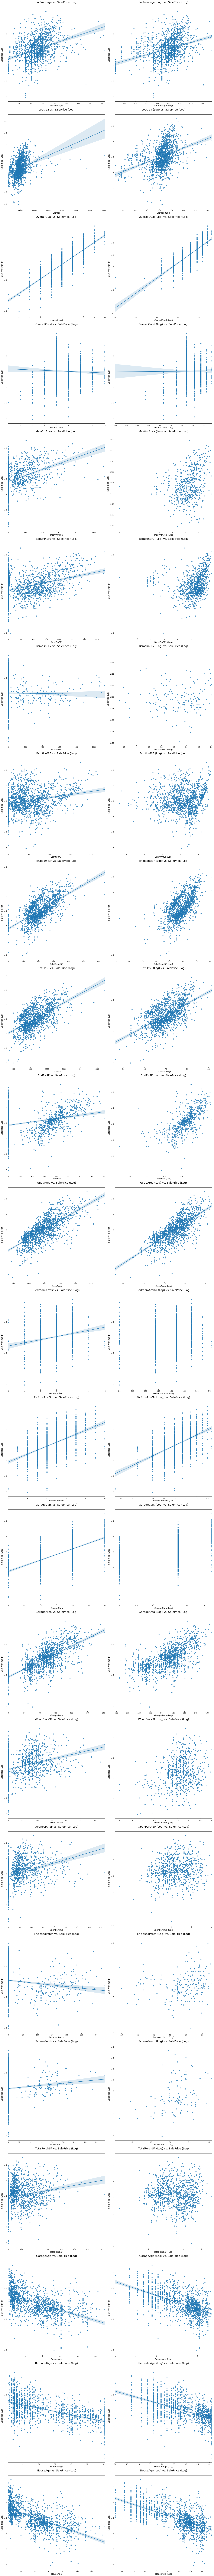

In [54]:
x_plot = 2
y_plot = total_features

x_size = 20
y_size = y_plot * 10

fig, axes = plt.subplots(y_plot, x_plot, figsize=(x_size, y_size))
        
for f in range(total_features):
    feature = numerical_to_review[f]

    sns.regplot(full[feature], np.log(full['SalePrice']), ax=axes[f,0])
    axes[f,0].set_title(f'{feature} vs. SalePrice (Log)\n', fontsize=18)
    axes[f,0].set_ylabel('SalePrice (Log)', fontsize=14)
    axes[f,0].set_xlabel(f'{feature}', fontsize=14)

    sns.regplot(np.log(full[feature]), np.log(full['SalePrice']), ax=axes[f,1])
    axes[f,1].set_title(f'{feature} (Log) vs. SalePrice (Log)\n', fontsize=18)
    axes[f,1].set_ylabel('SalePrice (Log)', fontsize=14)
    axes[f,1].set_xlabel(f'{feature} (Log)', fontsize=14)

fig.tight_layout()

### Log Transformation on Input Variables

After looking at the above graphs, we decided that a log transformation would be beneficial for the following variables:

- `LotFrontage`
- `LotArea`
- `1stFlrSF`
- `GrLivArea`
- `GarageAge`
- `RemodelAge`
- `HouseAge`


In [55]:
input_log_trans = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'GarageAge', 'RemodelAge', 'HouseAge']

In [56]:
for item in input_log_trans:
    full[item]=np.log(full[item])
    full[item][full[item].isin([np.inf, -np.inf])]=0

# Feature Scaling

As already mentioend earlier, some of the features in the dataset have significantly higher values than others and this cause linear models to fit poorly.  As we expect to use various forms of regression in building our model, we think it's important to look at the features with the highest values and the larger ranges and find opportunities for normalization.

In [57]:
cols = get_features(full, mode='numerical')
stats = pd.DataFrame(full[cols].describe().T)
stats['range'] = stats['max']-stats['min']
stats.sort_values('range', ascending=False).round(2)

count     mean     std    min     25%     50%      75%  \
MiscVal            2877.0    50.56  570.86   0.00    0.00    0.00     0.00   
Gar2               2877.0    15.22  414.44   0.00    0.00    0.00     0.00   
Othr               2877.0     4.52  148.52   0.00    0.00    0.00     0.00   
TotalBsmtSF        2877.0  1042.57  424.61   0.00  788.00  985.00  1290.00   
Shed               2877.0    24.21  178.64   0.00    0.00    0.00     0.00   
BsmtFinSF1         2877.0   433.83  438.75   0.00    0.00  362.00   728.00   
BsmtUnfSF          2877.0   559.92  438.44   0.00  220.00  467.00   801.00   
TenC               2877.0     0.70   37.29   0.00    0.00    0.00     0.00   
2ndFlrSF           2877.0   331.71  421.42   0.00    0.00    0.00   702.00   
BsmtFinSF2         2877.0    48.82  166.75   0.00    0.00    0.00     0.00   
GarageArea         2877.0   469.48  211.78   0.00  319.00  478.00   576.00   
WoodDeckSF         2877.0    92.37  123.65   0.00    0.00    0.00   168.00   
MasVnrArea         2877.0    99.14  172.84   0.00    0.00    0.00   161.00   
TotalPorchSF       2877.0    87.71  104.24   0.00    0.00   50.00   135.00   
LowQualFinSF       2877.0     4.25   43.92   0.00    0.00    0.00     0.00   
EnclosedPorch      2877.0    23.07   63.52   0.00    0.00    0.00     0.00   
PoolArea           2877.0     1.75   31.85   0.00    0.00    0.00     0.00   
OpenPorchSF        2877.0    46.71   65.44   0.00    0.00   26.00    69.00   
ScreenPorch        2877.0    15.60   54.87   0.00    0.00    0.00     0.00   
3SsnPorch          2877.0     2.32   22.31   0.00    0.00    0.00     0.00   
TotRmsAbvGrd       2877.0     6.42    1.54   2.00    5.00    6.00     7.00   
OverallQual        2877.0     6.07    1.39   1.00    5.00    6.00     7.00   
OverallCond        2877.0     5.57    1.11   1.00    5.00    5.00     6.00   
BedroomAbvGr       2877.0     2.85    0.81   0.00    2.00    3.00     3.00   
GarageCars         2877.0     1.76    0.75   0.00    1.00    2.00     2.00   
HouseAge           2877.0     3.25    1.05   0.00    2.30    3.64     4.06   
GarageAge          2877.0     3.10    1.01   0.00    2.20    3.47     3.93   
RemodelAge         2877.0     2.87    1.00   0.00    1.95    2.89     3.83   
Fireplaces         2877.0     0.59    0.64   0.00    0.00    1.00     1.00   
FullBath           2877.0     1.56    0.55   0.00    1.00    2.00     2.00   
LotArea            2877.0     9.08    0.49   7.17    8.91    9.15     9.35   
KitchenAbvGr       2877.0     1.04    0.21   0.00    1.00    1.00     1.00   
BsmtFullBath       2877.0     0.43    0.52   0.00    0.00    0.00     1.00   
GrLivArea          2877.0     7.25    0.32   5.81    7.02    7.27     7.46   
1stFlrSF           2877.0     7.00    0.32   5.81    6.77    6.98     7.23   
LotFrontage        2877.0     4.19    0.34   3.04    4.09    4.23     4.38   
HalfBath           2877.0     0.38    0.50   0.00    0.00    0.00     1.00   
BsmtHalfBath       2877.0     0.06    0.24   0.00    0.00    0.00     0.00   
NeighborhoodPrice  2877.0    12.02    0.30  11.39   11.81   11.94    12.19   
Pool               2877.0     0.00    0.06   0.00    0.00    0.00     0.00   
Garage             2877.0     0.95    0.23   0.00    1.00    1.00     1.00   
Deck               2877.0     0.48    0.50   0.00    0.00    0.00     1.00   
Basement           2877.0     0.97    0.16   0.00    1.00    1.00     1.00   
2ndFloor           2877.0     0.43    0.49   0.00    0.00    0.00     1.00   
Porch              2877.0     0.70    0.46   0.00    0.00    1.00     1.00   

                        max     range  
MiscVal            17000.00  17000.00  
Gar2               15500.00  15500.00  
Othr                6500.00   6500.00  
TotalBsmtSF         5095.00   5095.00  
Shed                4500.00   4500.00  
BsmtFinSF1          4010.00   4010.00  
BsmtUnfSF           2336.00   2336.00  
TenC                2000.00   2000.00  
2ndFlrSF            1862.00   1862.00  
BsmtFinSF2          1526.00   1

The decision to normalize is limited to only features that express an actual measure (area or dollar value, for example).  We prefer to keep smaller features, such as number of bedrooms or bathrooms, unchanged as they are important characteristics of the properties and we don't think we should lose information in normalizing them.

In [58]:
to_standard = ['MiscVal', 'Gar2', 'Othr', 'TotalBsmtSF', 'Shed', 'BsmtFinSF1',
               'BsmtUnfSF', 'TenC', '2ndFlrSF', 'BsmtFinSF2', 'GarageArea', 'WoodDeckSF', 'MasVnrArea',
               'TotalPorchSF', 'LowQualFinSF', 'EnclosedPorch', 'PoolArea', 'OpenPorchSF', 'ScreenPorch',
               '3SsnPorch']

In [59]:
scaler = StandardScaler()
full[to_standard] = scaler.fit_transform(full[to_standard])

# Features correlatation to the SalePrice

The last step of our exploratory data analysis has to do with the correlation of the new features among each other and with the output variable.  This is similar to what we have already done at the very beginning of the analysis, but it will now be based on the new features that have ben introduced in the dataset.

In [60]:
full.drop(['Id','SalePrice'],1).describe(percentiles=[.05, .25, .5, .75, .95]).T.sort_values('mean', ascending=False).round(2)

count   mean   std    min     5%    25%    50%    75%  \
NeighborhoodPrice      2877.0  12.02  0.30  11.39  11.57  11.81  11.94  12.19   
LotArea                2877.0   9.08  0.49   7.17   8.07   8.91   9.15   9.35   
GrLivArea              2877.0   7.25  0.32   5.81   6.76   7.02   7.27   7.46   
1stFlrSF               2877.0   7.00  0.32   5.81   6.50   6.77   6.98   7.23   
TotRmsAbvGrd           2877.0   6.42  1.54   2.00   4.00   5.00   6.00   7.00   
OverallQual            2877.0   6.07  1.39   1.00   4.00   5.00   6.00   7.00   
OverallCond            2877.0   5.57  1.11   1.00   4.00   5.00   5.00   6.00   
LotFrontage            2877.0   4.19  0.34   3.04   3.53   4.09   4.23   4.38   
HouseAge               2877.0   3.25  1.05   0.00   1.39   2.30   3.64   4.06   
GarageAge              2877.0   3.10  1.01   0.00   1.39   2.20   3.47   3.93   
RemodelAge             2877.0   2.87  1.00   0.00   1.39   1.95   2.89   3.83   
BedroomAbvGr           2877.0   2.85  0.81   0.00   2.00   2.00   3.00   3.00   
GarageCars             2877.0   1.76  0.75   0.00   0.00   1.00   2.00   2.00   
FullBath               2877.0   1.56  0.55   0.00   1.00   1.00   2.00   2.00   
KitchenAbvGr           2877.0   1.04  0.21   0.00   1.00   1.00   1.00   1.00   
Utilities_AllPub       2877.0   1.00  0.02   0.00   1.00   1.00   1.00   1.00   
PoolQC_NA              2877.0   1.00  0.05   0.00   1.00   1.00   1.00   1.00   
Street_Pave            2877.0   1.00  0.06   0.00   1.00   1.00   1.00   1.00   
Condition2_Norm        2877.0   0.99  0.10   0.00   1.00   1.00   1.00   1.00   
RoofMatl_CompShg       2877.0   0.99  0.11   0.00   1.00   1.00   1.00   1.00   
Heating_GasA           2877.0   0.99  0.12   0.00   1.00   1.00   1.00   1.00   
Basement               2877.0   0.97  0.16   0.00   1.00   1.00   1.00   1.00   
LandSlope_Gtl          2877.0   0.95  0.21   0.00   1.00   1.00   1.00   1.00   
Garage                 2877.0   0.95  0.23   0.00   0.00   1.00   1.00   1.00   
Alley_NA               2877.0   0.93  0.25   0.00   0.00   1.00   1.00   1.00   
CentralAir_Y           2877.0   0.93  0.25   0.00   0.00   1.00   1.00   1.00   
Functional_Typ         2877.0   0.93  0.25   0.00   0.00   1.00   1.00   1.00   
Electrical_SBrkr       2877.0   0.91  0.28   0.00   0.00   1.00   1.00   1.00   
GarageCond_TA          2877.0   0.91  0.29   0.00   0.00   1.00   1.00   1.00   
PavedDrive_Y           2877.0   0.90  0.29   0.00   0.00   1.00   1.00   1.00   
LandContour_Lvl        2877.0   0.90  0.30   0.00   0.00   1.00   1.00   1.00   
BsmtCond_TA            2877.0   0.89  0.31   0.00   0.00   1.00   1.00   1.00   
GarageQual_TA          2877.0   0.89  0.31   0.00   0.00   1.00   1.00   1.00   
ExterCond_TA           2877.0   0.87  0.34   0.00   0.00   1.00   1.00   1.00   
SaleType_WD            2877.0   0.87  0.34   0.00   0.00   1.00   1.00   1.00   
Condition1_Norm        2877.0   0.86  0.35   0.00   0.00   1.00   1.00   1.00   
BsmtFinType2_Unf       2877.0   0.85  0.35   0.00   0.00   1.00   1.00   1.00   
BldgType_1Fam          2877.0   0.83  0.38   0.00   0.00   1.00   1.00   1.00   
SaleCondition_Normal   2877.0   0.82  0.38   0.00   0.00   1.00   1.00   1.00   
Fence_NA               2877.0   0.81  0.40   0.00   0.00   1.00   1.00   1.00   
RoofStyle_Gable        2877.0   0.79  0.40   0.00   0.00   1.00   1.00   1.00   
MSZoning_RL            2877.0   0.78  0.42   0.00   0.00   1.00   1.00   1.00   
LotConfig_Inside       2877.0   0.73  0.44   0.00   0.00   0.00   1.00   1.00   
Porch                  2877.0   0.70  0.46   0.00   0.00   0.00   1.00   1.00   
BsmtExposure_No        2877.0   0.66  0.48   0.00   0.00   0.00   1.00   1.00   
LotShape_Reg           2877.0   0.64  0.48   0.00   0.00   0.00   1.00   1.00   
ExterQual_TA           2877.0   0.62  0.49   0.00   0.00   0.00   1.00   1.00   
MasVnrType_None        2877.0   0.61  0.49   0.00   0.00   0.00   1.00   1.00   
GarageType_Attchd      2877.0   0.59  0.49   0.00   0.0

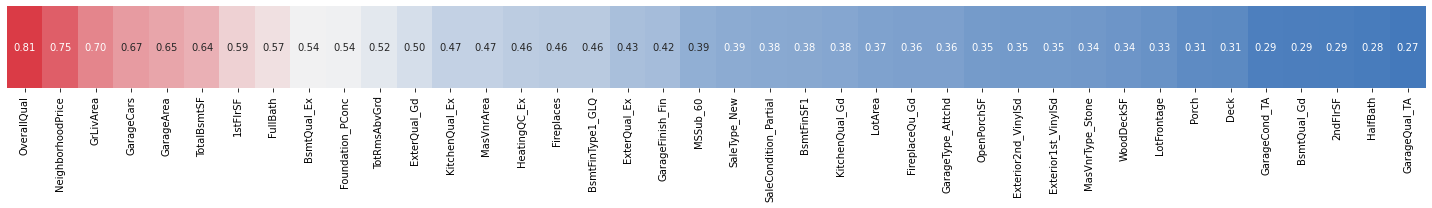

In [61]:
# Zooming on the correlation matrix 

threshold = 0.35      # Correlation threshold

corr_matrix = full.corr().drop('Id')
sale_corr = pd.DataFrame(corr_matrix['SalePrice']).drop('SalePrice')
k = len([i for i in corr_matrix['SalePrice'] if abs(i) >= threshold])
corr_features = sale_corr.nlargest(k, 'SalePrice').T

fig, ax = plt.subplots(figsize=(20,3))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr_features, annot=True, fmt='.2f', cmap=cmap, ax=ax, cbar=False, yticklabels=False)
fig.tight_layout()

The heatmap above gives us an idea of which features play a more important role in predicting the sale price of the property.  It is important to notice that there seems to be not many surprises, i.e. features like the overall quality of the house, the neighborhood, the square footage are all key component of the value.

Yet, we notice that some important features (e.g. `GarageCars` and `GarageArea`) coulde be redundant as they probably have a pretty high correlation with each other.  We will explore more of this in the next section.

# Multicollinearity and Feature selection

The problem of multicollinearity is a very well known issue in statistics.  It could also impact the performance of a machine learning model.  Hence we are going to take a look at the features in our dataset, evaluate how they are correlated with each other and discuss the possibility of choosing a subset of them for the purpose of building a final model.

In [62]:
threshold = 0.85

corr_matrix_tmp = corr_matrix.abs().drop(['SalePrice'], axis=1).drop(['SalePrice'], axis=0)
mask = np.zeros_like(corr_matrix_tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix_tmp = corr_matrix_tmp * mask

corr_vector = corr_matrix_tmp.unstack().sort_values(kind="quicksort", ascending=False)
corr_vector = pd.DataFrame(corr_vector[(corr_vector<1.0) & (corr_vector>threshold)], columns=['Correlation'])
corr_vector = corr_vector.reset_index().rename(columns={'level_0' : 'Var1', 'level_1' : 'Var2'})
SPcorr1=[]
SPcorr2=[]
for item1, item2 in zip(corr_vector['Var1'], corr_vector['Var2']):
    corr_to_SP1 = abs(full['SalePrice'].corr(full[item1]))
    corr_to_SP2 = abs(full['SalePrice'].corr(full[item2]))
    SPcorr1.append(corr_to_SP1)
    SPcorr2.append(corr_to_SP2)
corr_vector['Var1_to_SP'] = SPcorr1
corr_vector['Var2_to_SP'] = SPcorr2

drop_var1 = (corr_vector['Var1_to_SP'] >= corr_vector['Var2_to_SP']) & (corr_vector['Correlation'] > threshold)
drop_var2 = (corr_vector['Var2_to_SP'] >= corr_vector['Var1_to_SP']) & (corr_vector['Correlation'] > threshold)
corr_vector['Drop_Var'] = (corr_vector['Var1']*drop_var1) + (corr_vector['Var2']*drop_var2)
drop_list = list(filter(None, corr_vector['Drop_Var'].unique()))
corr_vector.round(4)


Var1                 Var2  Correlation  Var1_to_SP  \
0         BsmtFinType1_NA             Basement       1.0000      0.1633   
1           GarageCond_NA               Garage       0.9966      0.2508   
2         GarageFinish_NA               Garage       0.9966      0.2508   
3           GarageQual_NA               Garage       0.9966      0.2508   
4           GarageType_NA               Garage       0.9966      0.2508   
5         BsmtFinType2_NA             Basement       0.9936      0.1547   
6         BsmtFinType2_NA      BsmtFinType1_NA       0.9936      0.1547   
7           GarageCond_NA        GarageType_NA       0.9932      0.2508   
8           GarageQual_NA        GarageType_NA       0.9932      0.2508   
9         GarageFinish_NA        GarageType_NA       0.9932      0.2508   
10            BsmtQual_NA             Basement       0.9872      0.1633   
11        BsmtFinType1_NA          BsmtQual_NA       0.9872      0.1633   
12    Exterior2nd_CmentBd  Exterior1st_CemntBd       0.9872      0.1535   
13  SaleCondition_Partial         SaleType_New       0.9862      0.3810   
14            BsmtCond_NA             Basement       0.9810      0.1633   
15        BsmtFinType1_NA          BsmtCond_NA       0.9810      0.1633   
16        BsmtExposure_NA             Basement       0.9810      0.1603   
17        BsmtFinType1_NA      BsmtExposure_NA       0.9810      0.1633   
18        BsmtFinType2_NA          BsmtQual_NA       0.9809      0.1547   
19    Exterior2nd_VinylSd  Exterior1st_VinylSd       0.9779      0.3486   
20        BsmtFinType2_NA          BsmtCond_NA       0.9747      0.1547   
21        BsmtFinType2_NA      BsmtExposure_NA       0.9747      0.1547   
22        BldgType_2fmCon            MSSub_190       0.9739      0.1115   
23    Exterior2nd_MetalSd  Exterior1st_MetalSd       0.9694      0.1588   
24        BsmtExposure_NA          BsmtQual_NA       0.9685      0.1603   
25            BsmtCond_NA          BsmtQual_NA       0.9685      0.1633   
26        BsmtExposure_NA          BsmtCond_NA       0.9623      0.1603   
27        HouseStyle_SLvl             MSSub_80       0.9581      0.0405   
28          LandSlope_Gtl        LandSlope_Mod       0.9517      0.0294   
29          LandSlope_Mod        LandSlope_Gtl       0.9517      0.0373   
30          RoofStyle_Hip      RoofStyle_Gable       0.9422      0.2177   
31           LotShape_Reg         LotShape_IR1       0.9368      0.2653   
32      HouseStyle_1.5Fin             MSSub_50       0.9337      0.1749   
33                   Pool             PoolArea       0.9290      0.0311   
34               2ndFloor             2ndFlrSF       0.9116      0.1293   
35         FireplaceQu_NA           Fireplaces       0.9065      0.4819   
36           ExterQual_Gd         ExterQual_TA       0.9056      0.4988   
37           ExterQual_TA         ExterQual_Gd       0.9056      0.6153   
38               HouseAge            GarageAge       0.9038      0.6374   
39             GarageArea           GarageCars       0.8938      0.6531   
40             GarageCars           GarageArea       0.8938      0.6669   
41    Exterior2nd_HdBoard  Exterior1st_HdBoard       0.8892      0.0878   
42           ExterCond_TA         ExterCond_Gd       0.8711      0.1325   
43           PavedDrive_Y         PavedDrive_N       0.8698      0.2470   
44      HouseStyle_1Story             2ndFloor       0.8681      0.0508   
45    Exterior2nd_Wd Sdng  Exterior1st_Wd Sdng       0.8651      0.1822   
46      HouseStyle_1.5Unf             MSSub_45       0.8643      0.0934   
47       Electrical_SBrkr     Electrical_FuseA       0.8592      0.2551   
48    Exterior2nd_AsbShng  Exterior1st_AsbShng       0.8539      0.1053   

    Var2_to_SP                      Drop_Var  
0       0.1633       BsmtFinType1_NABasement  
1       0.2508           GarageCond_NAGarage  
2       0.2508         GarageFinish_NAGarage  
3       0.2508           GarageQual_NAGarage  
4       0.2508           GarageType

In [63]:
print(drop_list)

['BsmtFinType1_NABasement', 'GarageCond_NAGarage', 'GarageFinish_NAGarage', 'GarageQual_NAGarage', 'GarageType_NAGarage', 'Basement', 'BsmtFinType1_NA', 'GarageCond_NAGarageType_NA', 'GarageQual_NAGarageType_NA', 'GarageFinish_NAGarageType_NA', 'BsmtQual_NABasement', 'BsmtFinType1_NABsmtQual_NA', 'Exterior2nd_CmentBd', 'SaleType_New', 'BsmtCond_NABasement', 'BsmtFinType1_NABsmtCond_NA', 'BsmtQual_NA', 'Exterior2nd_VinylSd', 'BsmtCond_NA', 'BsmtExposure_NA', 'BldgType_2fmCon', 'Exterior1st_MetalSd', 'BsmtCond_NABsmtQual_NA', 'HouseStyle_SLvl', 'LandSlope_Mod', 'RoofStyle_Hip', 'LotShape_Reg', 'HouseStyle_1.5Fin', 'PoolArea', '2ndFlrSF', 'FireplaceQu_NA', 'ExterQual_TA', 'HouseAge', 'GarageCars', 'Exterior1st_HdBoard', 'ExterCond_TA', 'PavedDrive_Y', '2ndFloor', 'Exterior1st_Wd Sdng', 'HouseStyle_1.5Unf', 'Electrical_SBrkr', 'Exterior1st_AsbShng']


In [64]:
keep_list = [item for item in all_features if item not in drop_list]
keep_list.extend(['Id', 'SalePrice', 'isTrain', 'isTest'])
full_reduced = full[keep_list]

print (full.shape, full_reduced.shape)


(2877, 318) (2877, 289)


# General Approach and Model Selection

### Models Considered

The problem of estimating home prices is a regression problem, which can be solved in many different ways and using many available tools.  Ths most natural candidate is a linear regression model.  Yet, linear regression tends to work better when data is more dense and there is a somewhat linear relationship between input and output variables.  While this seems to be a reasonable assumption for the middle part of the market, we have already noticed during data exploration that at the extremes of the market (cheap and expensive houses) the behavior becomes more difficult to model with a linear relationship.  Given this fact and the relatively large number of features that we are dealing with, especially afte the conversion of categorical variables, we have also select RandomForest Regressor as another model for evaluation. While there exist additional regression models that could be helpful in solving our inference problem, (e.g. Lasso, Ridge, and even SVM regressor), Linear regression and RandomForest are our candidates of choice to begin the evaluation and analysis of the model.

Linear regression is a method of modeling a target value based on independent predictors. This method is mostly used for forecasting and causal analysis between variables. The motive of the linear regression algorithm is to find the best values for coefficients by minimizing the error between the predicted value and the actual value with a cost function of Root Mean Squared Error (RMSE). The biggest advantage of linear regression is that its easy to implement and explain, but on the other hand, it is easily impacted by outliers and the underlying assumptions are not always satisfied in real projects.

Compared with linear regression, RandomForest is a more complicated model, which uses an ensemble learning method (bagging) for classification and regression. It is constructed by a multitude of decision trees that run in parallel and outputs mean prediction of individual trees for regression. The key modification of RandomForest is to split the number of features at each node with a limited percentage of the total (hyperparameter) so that the ensemble model is relatively independent of the individual features. Another modification is to allow each tree to draw a random sample to prevent overfitting. As a result, RandomForest is known to be one of the most accurate learning algorithms available, and it runs efficiently on large databases. However, RandomForest is likely to overfit the dataset with a lot of noise.

### Segmentation of houses/sales

The diverse nature of the houses sold in Ames, Iowa provided opportunity for segmentation before running a regressor. To improve RMSE we classified the samples into 3 groups (Low, Medium & High) based on the sale price and trained a Logistic Regression and RandomForest Classification model using the features. Logistic Regression was selected based on its higher accuracy. The idea was to train three different Regression models for each of the groups identified through classification on the test set and generalize well within the groups.

The different options considered for segmentation were:
- Segmentation by neighborhood / commercial vs. residential / other characteristics
- Segmentation by sale price ( with 3 approaches (using a classifier, e.g. Logistic Regression or RandomForest)
  - By median
  - By mean
  - By quartiles (three groups using a fine tuned low and high percentage for quartile split)

While the approach of using three different models for each of the sale price quartiles improves the RMSE in the generalize step of the regressions, the accuracy of the final model greatly depends on the below:
- Accuracy of the classification algorithm on the Test datset
- Distribution of the samples across quantiles in the Test dataset
  - After classification into quantiles, if the Test datset distribution is not similar to the Train dataset distribution RMSE will vary on the Test set based on the difference in distriutions. This is due to the difference in the RMSE achived by each of the models within the Low, Med and High groups where Med has the lowest RMSE followed by Low and then High.


### Model Selection And Performance Evaluation

Classification model selection for quantiles is based on the accuracy using the dev data in the generalize step of training. Regression model selection for each of the three quartiles will be based on the results of the Log Root-Mean-Squared Error (RMSE) score using the dev data in the generalize step of training. This is in line with how Kaggle is going to evaluate the performance of our model and should allow for a more consistent comparison of results. As noted on the Kaggle website, the choice of logs implies that errors in predicting expensive houses and cheap houses will affect the result equally.


# Fitting the Data

In the next few cells, we have several Python functions that will help us run multiple tests, leveraging variables to modify the characteristics of the model being used.


In [65]:
# Split again into train and test

def setup_and_split(data, features=None, split_ratio=0.8, class_split=False, verbose=False):
    np.random.seed(0)
    if verbose:
        print(f'\n{color.BOLD}SETUP AND SPLIT{color.END}')
        
    if features is None:
        features = get_features(data, mode='all')

    X_train = data[data['isTrain']]
    X_train.drop(['Id','SalePrice'], axis = 1, inplace = True)
    X_train = X_train[features]

    X_test = data[data['isTest']]
    X_test.drop(['SalePrice'], axis = 1, inplace = True)
    
    if class_split:
        features.append('Id')
        X_test = X_test[features]
        X_test = X_test.drop(['Id','SaleClass'], axis=1)
        y_train_class = data[data['isTrain']]['SaleClass']
        y_train_class = np.asarray(y_train_class)
    else:
        X_test = X_test[features]
     
    y_train = data[data['isTrain']]['SalePrice']
    y_train = np.asarray(y_train)

    if class_split:
        X_train_v = []
        y_train_v = []
        y_train_class_v = []
        X_v = []
        Y_v = []
        Y_class_v = []
        train_data_v = []
        train_labels_v = []
        train_labels_class_v = []
        dev_data_v = []
        dev_labels_v = []
        dev_labels_class_v = []
        
        for index in range(len(data['SaleClass'].unique())):
            saleclass = sorted(data['SaleClass'].unique())[index]
            X_train_v.append(X_train[X_train['SaleClass']==saleclass])
            X_train_v[index].drop('SaleClass', axis=1, inplace=True)
            X_train_v[index] = np.asarray(X_train_v[index])
            y_train_v.append(data[(data['isTrain']) & (data['SaleClass']==saleclass)]['SalePrice'])
            y_train_v[index] = np.asarray(y_train_v[index])
            y_train_class_v.append(data[(data['isTrain']) & (data['SaleClass']==saleclass)]['SaleClass'])
            y_train_class_v[index] = np.asarray(y_train_class_v[index])
            
            size = X_train_v[index].shape[0]
            feature_count = X_train_v[index].shape[1]
            labels = y_train_v[index].shape[0]
            shuffle = np.random.permutation(np.arange(size))
            X_v.append(X_train_v[index][shuffle])
            Y_v.append(y_train_v[index][shuffle])
            Y_class_v.append(y_train_class_v[index][shuffle])
       
            if verbose:
                print(f'\nClass \033[1m{saleclass}\033[0m')
                print(f'Training dataset size: \033[1m{size}\033[0m')
                print(f'Number of features: \033[1m{feature_count}\033[0m')
                print(f'Training labels: \033[1m{labels}\033[0m')
                print(f'X_train shape: \033[1m{X_train_v[index].shape}\033[0m, '
                      f'y_train shape: \033[1m{y_train_v[index].shape}\033[0m, '
                      f'y_train_class shape: \033[1m{y_train_class_v[index].shape}\033[0m'
                      f'X_test shape: \033[1m{X_test.shape}\033[0m,')

            split = int(size*split_ratio)

            train_data_v.append(X_v[index][:split])
            train_labels_v.append(Y_v[index][:split])
            train_labels_class_v.append(Y_class_v[index][:split])
            dev_data_v.append(X_v[index][split:])
            dev_labels_v.append(Y_v[index][split:])
            dev_labels_class_v.append(Y_class_v[index][split:])
            test_data = X_test

            if verbose:
                print(f'\nTrain data shape: \033[1m{train_data_v[index].shape}\033[0m, '
                f'Dev data shape: \033[1m{dev_data_v[index].shape}\033[0m')
                print(f'Train labels shape: \033[1m{train_labels_v[index].shape}\033[0m, '
                f'Dev labels shape: \033[1m{dev_labels_v[index].shape}\033[0m')
                print(f'Train labels class shape: \033[1m{train_labels_class_v[index].shape}\033[0m, '
                f'Dev labels class shape: \033[1m{dev_labels_class_v[index].shape}\033[0m')


        return train_data_v, train_labels_v, train_labels_class_v, dev_data_v, dev_labels_v, dev_labels_class_v, test_data
    
    else:
        X_train = np.asarray(X_train)
        X_test = np.asarray(X_test)

        size = X_train.shape[0]
        feature_count = X_train.shape[1]
        labels = y_train.shape[0]

        shuffle = np.random.permutation(np.arange(size))
        X, Y = X_train[shuffle], y_train[shuffle]

        if verbose:
            print(f'\nThe size of the training dataset is \033[1m{size}\033[0m samples')
            print(f'The dataset contains \033[1m{feature_count}\033[0m features')
            print(f'There are \033[1m{labels}\033[0m labels')
            print(f'\nX_train shape is \033[1m{X_train.shape}\033[0m, '
                  f'y_train shape is \033[1m{y_train.shape}\033[0m')

        split = int(size*split_ratio)

        train_data, train_labels = X[:split], Y[:split]
        dev_data, dev_labels = X[split:], Y[split:]
        test_data = X_test

        if verbose:
            print(f'\nTrain data shape is \033[1m{train_data.shape}\033[0m, '
                  f'Dev data shape is \033[1m{dev_data.shape}\033[0m')
            print(f'Train labels shape is \033[1m{train_labels.shape}\033[0m, '
                  f'Dev labels shape is \033[1m{dev_labels.shape}\033[0m')

        return [train_data], [train_labels], [dev_data], [dev_labels], test_data


In [66]:
def classify(train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data, model='logistic',
             transform='none', c=0.1, max_depth=10, verbose=False):

    if verbose:
        print(f'\n{color.BOLD}CLASSIFY{color.END}')
        
    train_data = []
    dev_data = []
    train_labels = []
    dev_labels = []
    
    for index in range(len(train_data_v)):
        train_data.extend(train_data_v[index])
        dev_data.extend(dev_data_v[index])
        train_labels.extend(train_labels_v[index])
        dev_labels.extend(dev_labels_v[index])
    
    train_data = np.asarray(train_data)
    dev_data = np.asarray(dev_data)
    train_labels = np.asarray(train_labels)
    dev_labels = np.asarray(dev_labels)
    test_data = np.asarray(test_data)
    
    if verbose:
        print(f'\nSize of train_data: {train_data.shape}')
        print(f'Size of dev_data: {dev_data.shape}')
        print(f'Size of train_labels: {train_labels.shape}')
        print(f'Size of dev_labels: {dev_labels.shape}')
        print(f'Size of test_data: {test_data.shape}')
        
    
    if model == 'logistic':
        clf = LogisticRegression(C=c)
    elif model == 'randforest':
        clf = RandomForestClassifier(max_depth=max_depth, random_state=0)
    if transform == 'none':
        clf.fit(train_data, train_labels)
        accuracy = clf.score(dev_data, dev_labels)
        accuracy_train = clf.score(train_data, train_labels)
    elif transform == 'y_log':
        clf.fit(train_data, np.log(train_labels))
        accuracy = clf.score(dev_data, np.log(dev_labels))
        accuracy_train = clf.score(train_data, np.log(train_labels))
    preds_dev = clf.predict(dev_data)
    preds_train = clf.predict(train_data)
    preds_test = clf.predict(test_data)
    f1 = f1_score(train_labels, preds_train, average="weighted")
    if verbose:
        print(f'\nAccuracy on dev: {color.BOLD}{accuracy:10.4f}{color.END}')
        print(f'Accuracy on train: {color.BOLD}{accuracy_train:8.4f}{color.END}')
        print(f'F1 Score: {color.BOLD}{f1:17.4f}{color.END}')

    return clf, preds_dev, preds_train, preds_test, accuracy, accuracy_train, f1

In [67]:
def regression(full, train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data_v, indexes_v=None,
               clf=None, models={0 : 'linreg'}, transform='y_log', a=0.1, l1=0.5, max_depth=None, 
               model_name=None, verbose=False):

    if verbose:
        print(f'\n{color.BOLD}REGRESSION{color.END}')

    full_dev_labels = []
    full_predictions = []
    full_test = []

    if clf:
        dev_data = np.concatenate(dev_data_v)
        dev_labels = np.concatenate(dev_labels_v)
        if verbose:
            print(f'Dev data shape: {dev_data.shape} - Dev labels shape: {dev_labels.shape}')
            
        new_classes=clf.predict(dev_data)    
        classes = np.unique(new_classes)
        n_classes = len(classes)
        
        if verbose:
            print(f'Number of classes found: {n_classes}')
            print(f'Classes: {classes}')

        for index in range(n_classes):
            if verbose:
                print(f'Original shape of dev data: {dev_data_v[index].shape} and labels: {dev_labels_v[index].shape}')
            dev_data_v[index]=dev_data[new_classes==index]
            dev_labels_v[index]=dev_labels[new_classes==index]
            if verbose:
                print(f'New shape of dev data: {dev_data_v[index].shape} and labels: {dev_labels_v[index].shape}')

    for index in range(len(train_data_v)):

        if len(train_data_v)>1:
            saleclass = sorted(full['SaleClass'].unique())[index]
        else:
            saleclass = index
        
        if models[saleclass] =='linreg':
            regressor = LinearRegression(fit_intercept=True)
        elif models[saleclass] == 'randforest':
            regressor = RandomForestRegressor(random_state=0,max_depth=max_depth)
        elif models[saleclass] == 'lasso':
            regressor = Lasso(alpha=a)
        elif models[saleclass] == 'ridge':
            regressor = Ridge(alpha=a)
        elif models[saleclass] == 'elastic':
            regressor = ElasticNet(alpha=a, l1_ratio=l1)
        else:
            print('Unsupported Model')
            return None, None, None, None, None
        if verbose:
            print(f'\nSaleClass: {saleclass}'
                  f' - Model: {models[saleclass]}'
                  f' - Train Size: {len(train_data_v[index])}'
                  f' - Dev Size: {len(dev_data_v[index])}'
                  f' - Test Size: {len(test_data_v[index])}'
                  f' - Mean Price {train_labels_v[index].mean():.0f}')
        if transform == 'y_log':
            regressor.fit(train_data_v[index], np.log(train_labels_v[index]))
            predictions = regressor.predict(dev_data_v[index])
            if np.isnan(predictions).any():
                if verbose:
                    print('NaN in predictions')
                return None, None, None, None, None
            if (len(test_data_v[index])>0):
                pred_test = regressor.predict(test_data_v[index])
                if np.isnan(pred_test).any():
                    if verbose:
                        print('NaN in pred_test')
                    return None, None, None, None, None
            else:
                pred_test = []
            error_dev = regressor.score(dev_data_v[index], np.log(dev_labels_v[index]))
            error_train = regressor.score(train_data_v[index], np.log(train_labels_v[index]))
            error_dev = regressor.score(dev_data_v[index], dev_labels_v[index])
            error_train = regressor.score(train_data_v[index], train_labels_v[index])
            if (predictions < 0).any():
                if verbose:
                    print('Negative Predictions')
                return None, None, None, None, None
            if np.isnan(predictions).any():
                if verbose:
                    print('NaN in predictions')
                return None, None, None, None, None
            if not np.isfinite(predictions).all():
                if verbose:
                    print('Infinite in predictions')
                return None, None, None, None, None
            if not np.isfinite(np.exp(predictions)).all():
                if verbose:
                    print('Infinite in exp(predictions)')
                return None, None, None, None, None
            if np.isnan(dev_labels_v[index]).any():
                if verbose:
                    print('NaN in labels')
                return None, None, None, None, None
            if not np.isfinite(dev_labels_v[index]).all():
                if verbose:
                    print('Infinite in labels')
                return None, None, None, None, None
            rmse = np.sqrt(mean_squared_error(dev_labels_v[index], np.exp(predictions)))
            rmse_log = np.sqrt(mean_squared_log_error(dev_labels_v[index], np.exp(predictions)))
        elif transform == 'none':
            regressor.fit(train_data_v[index], train_labels_v[index])
            predictions = regressor.predict(dev_data_v[index])
            if np.isnan(predictions).any():
                if verbose:
                    print('NaN in predictions')
                return None, None, None, None, None
            if (len(test_data_v[index])>0):
                pred_test = regressor.predict(test_data_v[index])
                if np.isnan(pred_test).any():
                    if verbose:
                        print('NaN in pred_test')
                    return None, None, None, None, None
            else:
                pred_test = []
            error_dev = regressor.score(dev_data_v[index], dev_labels_v[index])
            error_train = regressor.score(train_data_v[index], train_labels_v[index])
            if (predictions < 0).any():
                if verbose:
                    print('Negative Predictions')
                return None, None, None, None, None
            if np.isnan(predictions).any():
                if verbose:
                    print('NaN in predictions')
                return None, None, None, None, None
            if not np.isfinite(predictions).all():
                if verbose:
                    print('Infinite in predictions')
                return None, None, None, None, None
            if not np.isfinite(np.exp(predictions)).all():
                if verbose:
                    print('Infinite in exp(predictions)')
                return None, None, None, None, None
            if np.isnan(dev_labels_v[index]).any():
                if verbose:
                    print('NaN in labels')
                return None, None, None, None, None
            if not np.isfinite(dev_labels_v[index]).all():
                if verbose:
                    print('Infinite in labels')
                return None, None, None, None, None
            rmse = np.sqrt(mean_squared_error(dev_labels_v[index], predictions))
            rmse_log = np.sqrt(mean_squared_log_error(dev_labels_v[index], predictions))
        else:
            print('Unsupported Transformation')
            return None, None, None, None, None
        if verbose:
            print (f'R^2 on train data {error_train:.5f}')
            print (f'R^2 on dev data {error_dev:.5f}')
            print (f'RMSE {rmse:.5f}')
            print (f'RMSE_LOG \033[92m\033[1m{rmse_log:.5f}\033[0m')
        
        full_dev_labels.extend(dev_labels_v[index])
        full_predictions.extend(predictions)
        full_test.extend(pred_test)
        
    if transform == 'none':
        total_rmse = np.sqrt(mean_squared_error(full_dev_labels, full_predictions))
        total_rmse_log = np.sqrt(mean_squared_log_error(full_dev_labels, full_predictions))
        predictions_submit = full_test
    elif transform == 'y_log':
        total_rmse = np.sqrt(mean_squared_error(full_dev_labels, np.exp(full_predictions)))
        total_rmse_log = np.sqrt(mean_squared_log_error(full_dev_labels, np.exp(full_predictions)))
        predictions_submit = np.exp(full_test)

    print ('\n\033[92mAGGREGATE VALUES\033[0m', end='')
    if model_name:
        print(f'\033[92m - Model: \033[95m\033[1m{model_name}\033[0m')
    else:
        print()
    print (f'RMSE \033[92m{total_rmse:12.2f}\033[0m')
    print (f'RMSE_LOG \033[92m\033[1m{total_rmse_log:7.5f}\033[0m')

    if indexes_v:
        sub_df = pd.concat(indexes_v, ignore_index=True).to_frame()
    else:
        sub_df = pd.DataFrame(full[full['isTest']]['Id'], columns = ['Id'])
    sub_df['SalePrice'] = predictions_submit
    sub_df = sub_df.set_index('Id')
    sub_df = sub_df.sort_values('Id')

    if model_name:
        sub_df.to_csv(f"./submissions/{model_name}.csv")

    if transform == 'none':
        return full_predictions, full_dev_labels, total_rmse, total_rmse_log, sub_df
    elif transform == 'y_log':
        return np.exp(full_predictions), full_dev_labels, total_rmse, total_rmse_log, sub_df

In [68]:
def update_results(results, modelname, rmse, rmse_log):
    try:
        model_df = pd.DataFrame([[rmse, rmse_log]], index=[modelname], columns=['RMSE', 'RMSE_LOG']).rename_axis(index='Model')
        results = pd.concat([results, model_df], sort=True, verify_integrity=True)
        return results
    except ValueError:
        results = results.drop(modelname, axis=0)
        model_df = pd.DataFrame([[rmse, rmse_log]], index=[modelname], columns=['RMSE', 'RMSE_LOG']).rename_axis(index='Model')
        results = pd.concat([results, model_df], sort=True, verify_integrity=True)
        return results


In [69]:
results = pd.DataFrame()

In [70]:
full['SaleClass']=np.nan
full_reduced['SaleClass']=np.nan

print(full.shape, full_reduced.shape)

(2877, 319) (2877, 290)


In [71]:
regressor = ['linreg', 'randforest', 'lasso', 'ridge', 'elastic']
regressor_name =['lr', 'rf', 'ls', 'rg', 'el']
regressor_dict=dict(zip(regressor, regressor_name))
classifier = ['logistic', 'randforest']
classifier_name = ['lgsc', 'rf']
classifier_dict = dict(zip(classifier, classifier_name))

In [72]:
def model(data, low_q=0.05, upp_q=0.95, 
          classifier='randforest', 
          m0='randforest', m1='randforest', m2='randforest',
          log_t='y_log', 
          a=0.01, l1=0.05, max_depth_class=10, max_depth_reg=None, 
          verbose=False):

    np.random.seed(0)

    results = pd.DataFrame()
    test_data_v = []
    indexes_v = []

    # features=get_features (data.drop('SaleClass',1), mode='correlation', threshold=0.8).append('SaleClass')
    features=get_features(data.drop('SaleClass',1), mode='all').append('SaleClass')

    lower_q = np.log(data['SalePrice']).quantile(q=low_q)
    upper_q = np.log(data['SalePrice']).quantile(q=upp_q)
    data['SaleClass']=np.where(np.log(data['SalePrice'])<lower_q, 0, (np.where(np.log(data['SalePrice'])>upper_q,2,1)))

    if classifier == 'randforest': classifier_name = 'rf'
    elif classifier == 'logistic' : classifier_name = 'lgstc'

    train_data_v, train_labels_v, train_labels_class_v, dev_data_v, dev_labels_v, dev_labels_class_v, test_data = setup_and_split(data, verbose=verbose, class_split=True)

    clf, preds_dev, preds_train, preds_test, accuracy, accuracy_train, f1 = classify(
      train_data_v, train_labels_class_v, dev_data_v, dev_labels_class_v, test_data, model=classifier, verbose=verbose,max_depth=max_depth_class)

    new_saleclass = pd.concat([data[data['isTrain']]['SaleClass'], pd.Series(preds_test)], ignore_index=True)
    data['SaleClass'] = new_saleclass

    saleclasses = len(data['SaleClass'].unique())

    for i in range(saleclasses):
        indexes_v.extend([data[(data['isTest']) & (data['SaleClass']==i)]['Id']])
        test_data_v.extend([data[(data['isTest']) & (data['SaleClass']==i)].drop(['SalePrice', 'Id', 'isTrain', 'isTest', 'SaleClass'],1)])

    models = {'linreg' : 'lr',
          'randforest' : 'rf',
          'lasso' : 'ls',
          'ridge' : 'rg',
          'elastic' : 'el'}

    m0_name = models[m0]
    m1_name = models[m1]
    m2_name = models[m2]

    modelname = f'{m0_name}_{m1_name}_{m2_name}_{log_t}_all_clean_split_quantile_{low_q:.2f}_{upp_q:.2f}_{classifier_name}'
    predictions,dev_labels,rmse, rmse_log, sub_df = regression(data, train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data_v, indexes_v, models={0:m0,1:m1,2:m2}, a=a, l1=l1, transform=log_t, model_name=modelname, verbose=verbose,max_depth=max_depth_reg)

    results = update_results(results, modelname, rmse, rmse_log)

    dev_data=[]
    sales_class=[]

    for index in range(len(dev_data_v)):
        if len(dev_data_v)>1:
            saleclass = sorted(data['SaleClass'].unique())[index]
        else:
            saleclass=index
        dev_data.extend(dev_data_v[index])
        sales_class.extend(np.full(shape=len(dev_data_v[index]),fill_value=saleclass,dtype=np.int))

    return preds_dev,predictions,dev_labels,dev_data,sales_class


# Model Selection

To choose the right regression model that provides the best performance in estimating house prices, we begin by evaluating the baseline performance of simple linear regression and random forest models.

## Full Data Set

In [73]:
data = full.drop('SaleClass',1)
features=get_features(full.drop('SaleClass',1), mode='all')

train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data = setup_and_split(data, features=features)
test_data_v = [test_data]

for m0, m0_name in zip(['linreg', 'randforest'], ['lr', 'rf']):
    log_t = 'y_log'
    modelname = f'{m0_name}_{log_t}_all_clean'
    preds, dev, rmse, rmse_log, sub_df = regression(
        data, train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data_v, models={0:m0}, 
        transform=log_t, model_name=modelname, verbose=True)
    results = update_results(results, modelname, rmse, rmse_log)




REGRESSION

SaleClass: 0 - Model: linreg - Train Size: 1134 - Dev Size: 284 - Test Size: 1459 - Mean Price 176385
Negative Predictions

REGRESSION

SaleClass: 0 - Model: randforest - Train Size: 1134 - Dev Size: 284 - Test Size: 1459 - Mean Price 176385
R^2 on train data -6.13229
R^2 on dev data -5.98455
RMSE 24894.00828
RMSE_LOG 0.14191

AGGREGATE VALUES - Model: rf_y_log_all_clean
RMSE     24894.01
RMSE_LOG 0.14191


With the data available to us, it looks like linear regression on the full data set is not able to provide a usable result as it generates negative predictions.

We can now evaluate how the use of a variation of linear regression (Lasso, Ridge and ElasticNet) could alleviate this problem.

In [74]:
data = full.drop('SaleClass',1)
features=get_features(full.drop('SaleClass',1), mode='all')

train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data = setup_and_split(data, features=features)
test_data_v = [test_data]

for m0, m0_name in zip(['lasso', 'ridge', 'elastic'], ['ls', 'rg', 'el']):
    log_t = 'y_log'
    modelname = f'{m0_name}_{log_t}_all_clean'
    preds, dev, rmse, rmse_log, sub_df = regression(
        data, train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data_v, models={0:m0}, 
        transform=log_t, model_name=modelname, verbose=True)
    results = update_results(results, modelname, rmse, rmse_log)




REGRESSION

SaleClass: 0 - Model: lasso - Train Size: 1134 - Dev Size: 284 - Test Size: 1459 - Mean Price 176385
R^2 on train data -6.13230
R^2 on dev data -5.98456
RMSE 42152.12963
RMSE_LOG 0.21367

AGGREGATE VALUES - Model: ls_y_log_all_clean
RMSE     42152.13
RMSE_LOG 0.21367

REGRESSION

SaleClass: 0 - Model: ridge - Train Size: 1134 - Dev Size: 284 - Test Size: 1459 - Mean Price 176385
R^2 on train data -6.13229
R^2 on dev data -5.98455
RMSE 19070.54052
RMSE_LOG 0.10857

AGGREGATE VALUES - Model: rg_y_log_all_clean
RMSE     19070.54
RMSE_LOG 0.10857

REGRESSION

SaleClass: 0 - Model: elastic - Train Size: 1134 - Dev Size: 284 - Test Size: 1459 - Mean Price 176385
R^2 on train data -6.13229
R^2 on dev data -5.98456
RMSE 34077.27642
RMSE_LOG 0.18161

AGGREGATE VALUES - Model: el_y_log_all_clean
RMSE     34077.28
RMSE_LOG 0.18161


In [75]:
results.sort_values('RMSE_LOG')

RMSE  RMSE_LOG
Model                                     
rg_y_log_all_clean  19070.540515  0.108574
rf_y_log_all_clean  24894.008278  0.141908
el_y_log_all_clean  34077.276417  0.181613
ls_y_log_all_clean  42152.129627  0.213667
lr_y_log_all_clean           NaN       NaN

## Split by Mean/Median

In the next few cells, we are going to investigate how the performance of our model change if we divide the problem in two subsets and choose the mean and the median of the sale price as the splitting criteria.

This also means that we have to introduce a classifier to help us figure out which components of the dev set (in the generalize phase) and test set (when we move to production) belong to which class.

In [76]:
data = full
features=get_features(full.drop('SaleClass',1), mode='all').append('SaleClass')

for cut, cutover in zip(['median', 'mean'],[data['SalePrice'].median(), data['SalePrice'].mean()]):
    data['SaleClass'] = np.where(data['SalePrice'] < cutover, 1, 0)
    train_data_v, train_labels_v, train_labels_class_v, dev_data_v, dev_labels_v, dev_labels_class_v, test_data = setup_and_split(
        data, class_split=True)

    for classifier, classifier_name in zip(['logistic', 'randforest'], ['lgstc', 'rf']):
        clf, preds_dev, preds_train, preds_test, accuracy, accuracy_train, f1 = classify(
            train_data_v, train_labels_class_v, dev_data_v, dev_labels_class_v, test_data, model=classifier)

        new_saleclass = pd.concat([data[data['isTrain']]['SaleClass'], pd.Series(preds_test)], ignore_index=True)
        data['SaleClass'] = new_saleclass

        saleclasses = len(data['SaleClass'].unique())

        test_data_v = []
        indexes_v = []
        for i in range(saleclasses):
            indexes_v.extend([data[(data['isTest']) & (data['SaleClass']==i)]['Id']])
            test_data_v.extend([data[(data['isTest']) & (data['SaleClass']==i)].drop(['SalePrice', 'Id', 'isTrain', 'isTest', 'SaleClass'],1)])

        for m0, m0_name in zip(regressor, regressor_name):
            for m1, m1_name in zip(regressor, regressor_name):
                log_t = 'y_log'
                modelname = f'{m0_name}_{m1_name}_{log_t}_all_spltby_{cut}_{classifier_name}'
                preds, dev, rmse, rmse_log, sub_df = regression(data, train_data_v, train_labels_v, dev_data_v, dev_labels_v, test_data_v, indexes_v, models={0:m0,1:m1}, transform=log_t, model_name=modelname)
                results = update_results(results, modelname, rmse, rmse_log)



AGGREGATE VALUES - Model: rf_rf_y_log_all_spltby_median_lgstc
RMSE     21493.57
RMSE_LOG 0.12136

AGGREGATE VALUES - Model: rf_ls_y_log_all_spltby_median_lgstc
RMSE     26045.58
RMSE_LOG 0.18300

AGGREGATE VALUES - Model: rf_rg_y_log_all_spltby_median_lgstc
RMSE     23575.10
RMSE_LOG 0.14621

AGGREGATE VALUES - Model: rf_el_y_log_all_spltby_median_lgstc
RMSE     23900.04
RMSE_LOG 0.15769

AGGREGATE VALUES - Model: ls_rf_y_log_all_spltby_median_lgstc
RMSE     36832.77
RMSE_LOG 0.16143

AGGREGATE VALUES - Model: ls_ls_y_log_all_spltby_median_lgstc
RMSE     39661.71
RMSE_LOG 0.21170

AGGREGATE VALUES - Model: ls_rg_y_log_all_spltby_median_lgstc
RMSE     38084.97
RMSE_LOG 0.18085

AGGREGATE VALUES - Model: ls_el_y_log_all_spltby_median_lgstc
RMSE     38286.96
RMSE_LOG 0.19026

AGGREGATE VALUES - Model: rg_rf_y_log_all_spltby_median_lgstc
RMSE     18566.35
RMSE_LOG 0.11516

AGGREGATE VALUES - Model: rg_ls_y_log_all_spltby_median_lgstc
RMSE     23687.72
RMSE_LOG 0.17894

AGGREGATE VALUES - 


AGGREGATE VALUES - Model: el_rf_y_log_all_spltby_mean_rf
RMSE     33782.24
RMSE_LOG 0.15198

AGGREGATE VALUES - Model: el_ls_y_log_all_spltby_mean_rf
RMSE     37848.54
RMSE_LOG 0.21944

AGGREGATE VALUES - Model: el_rg_y_log_all_spltby_mean_rf
RMSE     34564.39
RMSE_LOG 0.16150

AGGREGATE VALUES - Model: el_el_y_log_all_spltby_mean_rf
RMSE     36223.42
RMSE_LOG 0.19591


In [77]:
results.sort_values('RMSE_LOG')

RMSE  RMSE_LOG
Model                                                      
rg_y_log_all_clean                   19070.540515  0.108574
rg_rf_y_log_all_spltby_median_rf     18566.350387  0.115155
rg_rf_y_log_all_spltby_median_lgstc  18566.350387  0.115155
rf_rf_y_log_all_spltby_median_lgstc  21493.571219  0.121359
rf_rf_y_log_all_spltby_median_rf     21493.571219  0.121359
rg_rf_y_log_all_spltby_mean_rf       20905.350233  0.126622
rg_rf_y_log_all_spltby_mean_lgstc    20905.350233  0.126622
rf_rf_y_log_all_spltby_mean_lgstc    23745.737938  0.127611
rf_rf_y_log_all_spltby_mean_rf       23745.737938  0.127611
rg_rg_y_log_all_spltby_mean_lgstc    22147.031216  0.137908
rg_rg_y_log_all_spltby_mean_rf       22147.031216  0.137908
rf_rg_y_log_all_spltby_mean_rf       24845.872767  0.138816
rf_rg_y_log_all_spltby_mean_lgstc    24845.872767  0.138816
el_rf_y_log_all_spltby_median_rf     29955.002864  0.140619
el_rf_y_log_all_spltby_median_lgstc  29955.002864  0.140619
rg_rg_y_log_all_spltby_median_lgstc  20940.897091  0.141102
rg_rg_y_log_all_spltby_median_rf     20940.897091  0.141102
rf_y_log_all_clean                   24894.008278  0.141908
rf_rg_y_log_all_spltby_median_lgstc  23575.101442  0.146209
rf_rg_y_log_all_spltby_median_rf     23575.101442  0.146209
el_rf_y_log_all_spltby_mean_lgstc    33782.242075  0.151978
el_rf_y_log_all_spltby_mean_rf       33782.242075  0.151978
rg_el_y_log_all_spltby_median_lgstc  21306.051613  0.152971
rg_el_y_log_all_spltby_median_rf     21306.051613  0.152971
rf_el_y_log_all_spltby_median_rf     23900.043355  0.157694
rf_el_y_log_all_spltby_median_lgstc  23900.043355  0.157694
ls_rf_y_log_all_spltby_median_rf     36832.767785  0.161426
ls_rf_y_log_all_spltby_median_lgstc  36832.767785  0.161426
el_rg_y_log_all_spltby_mean_lgstc    34564.392124  0.161501
el_rg_y_log_all_spltby_mean_rf       34564.392124  0.161501
el_rg_y_log_all_spltby_median_lgstc  31481.963104  0.162551
el_rg_y_log_all_spltby_median_rf     31481.963104  0.162551
ls_rf_y_log_all_spltby_mean_rf       41211.570222  0.172551
ls_rf_y_log_all_spltby_mean_lgstc    41211.570222  0.172551
el_el_y_log_all_spltby_median_rf     31726.025046  0.172954
el_el_y_log_all_spltby_median_lgstc  31726.025046  0.172954
rg_el_y_log_all_spltby_mean_lgstc    24656.237859  0.176961
rg_el_y_log_all_spltby_mean_rf       24656.237859  0.176961
rf_el_y_log_all_spltby_mean_lgstc    27106.391631  0.177669
rf_el_y_log_all_spltby_mean_rf       27106.391631  0.177669
rg_ls_y_log_all_spltby_median_rf     23687.718101  0.178945
rg_ls_y_log_all_spltby_median_lgstc  23687.718101  0.178945
ls_rg_y_log_all_spltby_median_rf     38084.965366  0.180852
ls_rg_y_log_all_spltby_median_lgstc  38084.965366  0.180852
ls_rg_y_log_all_spltby_mean_rf       41855.117291  0.180995
ls_rg_y_log_all_spltby_mean_lgstc    41855.117291  0.180995
el_y_log_all_clean                   34077.276417  0.181613
rf_ls_y_log_all_spltby_median_lgstc  26045.579776  0.182999
rf_ls_y_log_all_spltby_median_rf     26045.579776  0.182999
ls_el_y_log_all_spltby_median_lgstc  38286.959285  0.190257
ls_el_y_log_all_spltby_median_rf     38286.959285  0.190257
el_el_y_log_all_spltby_mean_rf       36223.421658  0.195906
el_el_y_log_all_spltby_mean_lgstc    36223.421658  0.195906
el_ls_y_log_all_spltby_median_lgstc  33372.156339  0.196301
el_ls_y_log_all_spltby_median_rf     33372.156339  0.196301
rg_ls_y_log_all_spltby_mean_lgstc    26987.138963  0.202705
rg_ls_y_log_all_spltby_mean_rf       26987.138963  0.202705
rf_ls_y_log_all_spltby_mean_rf       29242.641318  0.203323
rf_ls_y_log_all_spltby_mean_lgstc    29242.641318  0.203323
ls_ls_y_log_all_spltby_median_rf     39661.712076  0.211705
ls_ls_y_log_all_spltby_median_lgstc  39661.712076  0.211705
ls_el_y_log_all_spltby_mean_lgstc    43235.285557  0.212263
ls_el_y_log_all_spltby_mean_rf       43235.285557  0.212263
ls_y_log_all_clean                   42152.129627  0.213667
el_ls_y_log_all_spltby_mean_lgstc    37848.538686  0.219438
el_ls_y_log_all_spltby_me

Some of the results obtained with a partition of the dataset in two halves are quite encouraging as we have seen a general improvement in the accuracy of our predictions.  This seems to confirm our intuition that the housing market behaves differently according to the class of the sale (e.g. cheap vs. expensive houses).

## Split by Quantiles

Continuing down the path of splitting the dataset to achieve better accuracy, we are now going to look into a division of the data set in three portions, determined by an upper and a lower quantile.

In [180]:
data = full
features=get_features(full.drop('SaleClass',1), mode='all').append('SaleClass')

for low_q in range(5, 30, 5):
    low_q /= 100
    for upp_q in range (75, 100, 5):
        upp_q /= 100
        
        lower_q = data['SalePrice'].quantile(q=low_q)
        upper_q = data['SalePrice'].quantile(q=upp_q)
        data['SaleClass']=np.where(data['SalePrice']<lower_q, 0, (np.where(data['SalePrice']>upper_q,2,1)))
        
        train_data_v, train_labels_v, train_labels_class_v, dev_data_v, dev_labels_v, dev_labels_class_v, test_data = setup_and_split(
                data, class_split=True)
        
        for classifier, classifier_name in zip(['logistic', 'randforest'], ['lgstc', 'rf']):
            clf, preds_dev, preds_train, preds_test, accuracy, accuracy_train, f1 = classify(
                train_data_v, train_labels_class_v, dev_data_v, dev_labels_class_v, test_data, model=classifier)

            new_saleclass = pd.concat([data[data['isTrain']]['SaleClass'], pd.Series(preds_test)], ignore_index=True)
            data['SaleClass'] = new_saleclass

            saleclasses = len(data['SaleClass'].unique())

            test_data_v = []
            indexes_v = []
            for i in range(saleclasses):
                indexes_v.extend([data[(data['isTest']) & (data['SaleClass']==i)]['Id']])
                test_data_v.extend([data[(data['isTest']) & (data['SaleClass']==i)].drop(['SalePrice', 'Id', 'isTrain', 'isTest', 'SaleClass'],1)])

            for m0, m0_name in zip(regressor, regressor_name):
                for m1, m1_name in zip(regressor, regressor_name):
                    for m2, m2_name in zip(regressor, regressor_name):
                        log_t = 'y_log'
                        modelname = f'{m0_name}_{m1_name}_{m2_name}_{log_t}_all_splt_quant_{low_q:.2f}_{upp_q:.2f}_{classifier_name}'
                        preds, dev, rmse, rmse_log, sub_df = regression(data, train_data_v, train_labels_v, 
                                                            dev_data_v, dev_labels_v, test_data_v, indexes_v, 
                                                            models={0:m0,1:m1, 2:m2}, transform=log_t, model_name=modelname)
                        results = update_results(results, modelname, rmse, rmse_log)



AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     19864.65
RMSE_LOG 0.11834

AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     30248.42
RMSE_LOG 0.13999

AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     20491.41
RMSE_LOG 0.12066

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     25921.06
RMSE_LOG 0.12950

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     27563.77
RMSE_LOG 0.17435

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     35778.82
RMSE_LOG 0.18972

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     28018.83
RMSE_LOG 0.17594

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     32203.39
RMSE_LOG 0.18211

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     19154.03
RMSE_LOG 0.11142

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     19151.15
RMSE_LOG 0.11131

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     29784.71
RMSE_LOG 0.13411

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     19800.51
RMSE_LOG 0.11378

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     25378.41
RMSE_LOG 0.12311

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     24921.21
RMSE_LOG 0.15534

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     33785.05
RMSE_LOG 0.17241

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     25423.62
RMSE_LOG 0.15711

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     29972.72
RMSE_LOG 0.16400

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.05_0.75_lgstc
RMSE     19596.71
RMSE_LOG 0.11166

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.05_0.75_rf
RMSE     25188.31
RMSE_LOG 0.15130

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.05_0.75_rf
RMSE     29773.39
RMSE_LOG 0.15844

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.05_0.75_rf
RMSE     19607.87
RMSE_LOG 0.11196

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.05_0.75_rf
RMSE     30080.41
RMSE_LOG 0.13465

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.05_0.75_rf
RMSE     20242.59
RMSE_LOG 0.11441

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.05_0.75_rf
RMSE     25724.81
RMSE_LOG 0.12370

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.05_0.75_rf
RMSE     27379.29
RMSE_LOG 0.17009

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.05_0.75_rf
RMSE     35636.89
RMSE_LOG 0.18581

AGGREGATE VALUES - Model: ls_ls_rg_y_log_all_splt_quant_0.05_0.75_rf
RMSE     27837.37
RMSE_LOG 0.17171

AGGREGATE VALUES - Model: ls_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     32876.17
RMSE_LOG 0.18958

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     39669.15
RMSE_LOG 0.20006

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     31816.57
RMSE_LOG 0.18851

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     36080.31
RMSE_LOG 0.19310

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     24262.88
RMSE_LOG 0.12520

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     32885.95
RMSE_LOG 0.14056

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     22806.55
RMSE_LOG 0.12357

AGGREGATE VALUES - Model: lr_rg_el_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     28454.06
RMSE_LOG 0.13047

AGGREGATE VALUES - Model: lr_el_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     29438.21
RMSE_LOG 0.16408

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     29436.33
RMSE_LOG 0.16400

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     36868.63
RMSE_LOG 0.17601

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     28247.99
RMSE_LOG 0.16276

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     32976.41
RMSE_LOG 0.16807

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     24736.36
RMSE_LOG 0.12334

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     33236.82
RMSE_LOG 0.13891

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     23309.63
RMSE_LOG 0.12169

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     28858.85
RMSE_LOG 0.12869

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.05_0.80_lgstc
RMSE     32714.97
RMSE_LOG 0.18548

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.05_0.80_rf
RMSE     33243.40
RMSE_LOG 0.13915

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.05_0.80_rf
RMSE     23319.01
RMSE_LOG 0.12197

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.05_0.80_rf
RMSE     28866.43
RMSE_LOG 0.12896

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.05_0.80_rf
RMSE     32721.66
RMSE_LOG 0.18567

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.05_0.80_rf
RMSE     39541.19
RMSE_LOG 0.19635

AGGREGATE VALUES - Model: ls_ls_rg_y_log_all_splt_quant_0.05_0.80_rf
RMSE     31656.89
RMSE_LOG 0.18457

AGGREGATE VALUES - Model: ls_ls_el_y_log_all_splt_quant_0.05_0.80_rf
RMSE     35939.57
RMSE_LOG 0.18926

AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.05_0.80_rf
RMSE     24053.10
RMSE_LOG 0.11919

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.05_0.80_rf
RMSE     32731.49
RMSE_LOG 0.13524

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quan


AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     18269.20
RMSE_LOG 0.11062

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     24050.07
RMSE_LOG 0.12062

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     20689.40
RMSE_LOG 0.11456

AGGREGATE VALUES - Model: lr_rg_el_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     21872.62
RMSE_LOG 0.11630

AGGREGATE VALUES - Model: lr_el_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     26218.50
RMSE_LOG 0.16027

AGGREGATE VALUES - Model: lr_el_ls_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     30529.52
RMSE_LOG 0.16733

AGGREGATE VALUES - Model: lr_el_rg_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     27958.84
RMSE_LOG 0.16301

AGGREGATE VALUES - Model: lr_el_el_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     28845.40
RMSE_LOG 0.16425

AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     18274.60
RMSE_LOG 0.10405

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     18314.01
RMSE_LOG 0.10539

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     24084.13
RMSE_LOG 0.11583

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     20728.97
RMSE_LOG 0.10951

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     21910.05
RMSE_LOG 0.11134

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     31286.71
RMSE_LOG 0.18865

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     34978.57
RMSE_LOG 0.19468

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     32758.91
RMSE_LOG 0.19098

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     33518.74
RMSE_LOG 0.19203

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.05_0.85_lgstc
RMSE     17978.53
RMSE_LOG 0.10348

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.05_0.85_rf
RMSE     17990.66
RMSE_LOG 0.10380

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.05_0.85_rf
RMSE     23839.17
RMSE_LOG 0.11439

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quant_0.05_0.85_rf
RMSE     20443.85
RMSE_LOG 0.10798

AGGREGATE VALUES - Model: ls_rg_el_y_log_all_splt_quant_0.05_0.85_rf
RMSE     21640.50
RMSE_LOG 0.10983

AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.05_0.85_rf
RMSE     26025.17
RMSE_LOG 0.15564

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.05_0.85_rf
RMSE     30363.66
RMSE_LOG 0.16290

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.05_0.85_rf
RMSE     27777.63
RMSE_LOG 0.15846

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.05_0.85_rf
RMSE     28669.79
RMSE_LOG 0.15973

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.05_0.85_rf
RMSE     18596.47
RMSE_LOG 0.11231

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     20296.28
RMSE_LOG 0.11105

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     24674.78
RMSE_LOG 0.11771

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     28302.60
RMSE_LOG 0.12960

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     23914.79
RMSE_LOG 0.11643

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     31851.32
RMSE_LOG 0.18865

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     34805.35
RMSE_LOG 0.19264

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     37464.72
RMSE_LOG 0.20013

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     34270.76
RMSE_LOG 0.19186

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     19095.51
RMSE_LOG 0.10954

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     19133.22
RMSE_LOG 0.11081

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     23727.33
RMSE_LOG 0.11748

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     27480.51
RMSE_LOG 0.12938

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     22935.97
RMSE_LOG 0.11620

AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     27854.08
RMSE_LOG 0.16424

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     31189.04
RMSE_LOG 0.16881

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     34131.34
RMSE_LOG 0.17730

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.05_0.90_lgstc
RMSE     30591.31
RMSE_LOG 0.16792

AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.05_0.90_rf
RMSE     20589.24
RMSE_LOG 0.11892

AGGREGATE VALUES - Model: lr_r


AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.05_0.90_rf
RMSE     20586.56
RMSE_LOG 0.11882

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.05_0.90_rf
RMSE     24914.11
RMSE_LOG 0.12507

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.05_0.90_rf
RMSE     28511.49
RMSE_LOG 0.13631

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.05_0.90_rf
RMSE     24161.64
RMSE_LOG 0.12387

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.05_0.90_rf
RMSE     32037.07
RMSE_LOG 0.19332

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.05_0.90_rf
RMSE     34975.42
RMSE_LOG 0.19723

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.05_0.90_rf
RMSE     37622.77
RMSE_LOG 0.20454

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.05_0.90_rf
RMSE     34443.47
RMSE_LOG 0.19646

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.05_0.90_rf
RMSE     19403.76
RMSE_LOG 0.11741

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     18104.53
RMSE_LOG 0.10183

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     19090.83
RMSE_LOG 0.10285

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     17693.52
RMSE_LOG 0.10128

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     18991.00
RMSE_LOG 0.10274

AGGREGATE VALUES - Model: rf_ls_lr_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     33612.06
RMSE_LOG 0.18730

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     33830.38
RMSE_LOG 0.18757

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     34368.30
RMSE_LOG 0.18813

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     33612.22
RMSE_LOG 0.18728

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     34312.95
RMSE_LOG 0.18807

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     27421.17
RMSE_LOG 0.15969

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     28082.13
RMSE_LOG 0.16035

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     27151.56
RMSE_LOG 0.15934

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     28014.36
RMSE_LOG 0.16027

AGGREGATE VALUES - Model: el_rf_lr_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     17733.92
RMSE_LOG 0.10268

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     18144.31
RMSE_LOG 0.10319

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     19128.55
RMSE_LOG 0.10420

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     17734.22
RMSE_LOG 0.10265

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.05_0.95_lgstc
RMSE     19028.92
RMSE_LOG 0.10409

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rf_rg_lr_y_log_all_splt_quant_0.05_0.95_rf
RMSE     18033.02
RMSE_LOG 0.10195

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.05_0.95_rf
RMSE     18436.75
RMSE_LOG 0.10246

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quant_0.05_0.95_rf
RMSE     19406.17
RMSE_LOG 0.10349

AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.05_0.95_rf
RMSE     18033.31
RMSE_LOG 0.10192

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.05_0.95_rf
RMSE     19307.97
RMSE_LOG 0.10337

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.05_0.95_rf
RMSE     26931.93
RMSE_LOG 0.15365

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.05_0.95_rf
RMSE     27203.91
RMSE_LOG 0.15399

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.05_0.95_rf
RMSE     27870.02
RMSE_LOG 0.15468

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.05_0.95_rf
RMSE     26932.12
RMSE_LOG 0.15363

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.05_0.95_rf
RMSE     19028.92
RMSE_LOG 0.10409

AGGREGATE VALUES - Model: el_ls_lr_y_log_all_splt_quant_0.05_0.95_rf
RMSE     33633.50
RMSE_LOG 0.18804

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.05_0.95_rf
RMSE     33851.68
RMSE_LOG 0.18832

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.05_0.95_rf
RMSE     34389.27
RMSE_LOG 0.18888

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.05_0.95_rf
RMSE     33633.66
RMSE_LOG 0.18802

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.05_0.95_rf
RMSE     34333.95
RMSE_LOG 0.18881

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.05_0.95_rf
RMSE     18072.95
RMSE_LOG 0.10331

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.05_0.95_rf
RMSE     18475.81
RMSE_LOG 0.10382

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.05_0.95_rf
RMSE     19443.28
RMSE_LOG 0.10483

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quan


AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     16692.76
RMSE_LOG 0.11197

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     25045.43
RMSE_LOG 0.12791

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     19912.52
RMSE_LOG 0.12002

AGGREGATE VALUES - Model: ls_rg_el_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     21621.06
RMSE_LOG 0.12026

AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     22705.33
RMSE_LOG 0.14995

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     29396.56
RMSE_LOG 0.16220

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     25167.29
RMSE_LOG 0.15606

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     26539.67
RMSE_LOG 0.15624

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.10_0.75_lgstc
RMSE     18296.50
RMSE_LOG 0.12382

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.10_0.75_rf
RMSE     16408.10
RMSE_LOG 0.10125

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.10_0.75_rf
RMSE     24856.61
RMSE_LOG 0.11864

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.10_0.75_rf
RMSE     19674.50
RMSE_LOG 0.11009

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.10_0.75_rf
RMSE     21402.05
RMSE_LOG 0.11035

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.10_0.75_rf
RMSE     25327.92
RMSE_LOG 0.16266

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.10_0.75_rf
RMSE     31466.31
RMSE_LOG 0.17402

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.10_0.75_rf
RMSE     27556.55
RMSE_LOG 0.16831

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.10_0.75_rf
RMSE     28815.36
RMSE_LOG 0.16847

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.10_0.75_rf
RMSE     16393.63
RMSE_LOG 0.10314

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.10_0.75_rf
RMSE     16563.75
RMSE_LOG 0.10809

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.10_0.75_rf
RMSE     24959.63
RMSE_LOG 0.12453

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.10_0.75_rf
RMSE     19804.50
RMSE_LOG 0.11642

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.10_0.75_rf
RMSE     21521.61
RMSE_LOG 0.11666

AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.10_0.75_rf
RMSE     22610.66
RMSE_LOG 0.14708

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.10_0.75_rf
RMSE     29323.49
RMSE_LOG 0.15955

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.10_0.75_rf
RMSE     25081.91
RMSE_LOG 0.15330

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.10_0.75_rf
RMSE     26458.72
RMSE_LOG 0.15348

AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     24864.32
RMSE_LOG 0.14238

AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_q


AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     24506.16
RMSE_LOG 0.13799

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     35521.64
RMSE_LOG 0.15769

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     24628.25
RMSE_LOG 0.14090

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     30629.35
RMSE_LOG 0.14705

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     32770.38
RMSE_LOG 0.19253

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     41654.93
RMSE_LOG 0.20711

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     32861.79
RMSE_LOG 0.19463

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     37569.98
RMSE_LOG 0.19913

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.10_0.80_lgstc
RMSE     24217.08
RMSE_LOG 0.13414

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.10_0.80_rf
RMSE     40860.70
RMSE_LOG 0.19445

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.10_0.80_rf
RMSE     31849.04
RMSE_LOG 0.18110

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.10_0.80_rf
RMSE     36687.43
RMSE_LOG 0.18594

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.10_0.80_rf
RMSE     22823.92
RMSE_LOG 0.11363

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quant_0.10_0.80_rf
RMSE     34382.65
RMSE_LOG 0.13688

AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.10_0.80_rf
RMSE     22954.96
RMSE_LOG 0.11714

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.10_0.80_rf
RMSE     29300.80
RMSE_LOG 0.12448

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.10_0.80_rf
RMSE     28150.91
RMSE_LOG 0.15449

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.10_0.80_rf
RMSE     38127.54
RMSE_LOG 0.17232

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.10_0.80_rf
RMSE     28250.31
RMSE_LOG 0.15784

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.10_0.80_rf
RMSE     38200.99
RMSE_LOG 0.17533

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.10_0.80_rf
RMSE     28356.30
RMSE_LOG 0.16039

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.10_0.80_rf
RMSE     33699.94
RMSE_LOG 0.16583

AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     22326.50
RMSE_LOG 0.13876

AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     27837.43
RMSE_LOG 0.14760

AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     22623.06
RMSE_LOG 0.14032

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     25615.30
RMSE_LOG 0.14358

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     33498.49
RMSE_LOG 0.20395

AGGREGATE VALUES - Model: lr_ls_ls_y_lo


AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     27517.98
RMSE_LOG 0.14337

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     22228.81
RMSE_LOG 0.13587

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     25267.78
RMSE_LOG 0.13923

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     33233.50
RMSE_LOG 0.20091

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     37160.67
RMSE_LOG 0.20711

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     33433.46
RMSE_LOG 0.20199

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     35526.56
RMSE_LOG 0.20426

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     21811.58
RMSE_LOG 0.13548

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.10_0.85_lgstc
RMSE     27426.17
RMSE_LOG 0.14452

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.10_0.85_rf
RMSE     32438.56
RMSE_LOG 0.18899

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.10_0.85_rf
RMSE     34591.92
RMSE_LOG 0.19142

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.10_0.85_rf
RMSE     20253.61
RMSE_LOG 0.11522

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quant_0.10_0.85_rf
RMSE     26204.17
RMSE_LOG 0.12572

AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.10_0.85_rf
RMSE     20580.07
RMSE_LOG 0.11708

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.10_0.85_rf
RMSE     23830.23
RMSE_LOG 0.12097

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.10_0.85_rf
RMSE     28042.60
RMSE_LOG 0.16203

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.10_0.85_rf
RMSE     32601.19
RMSE_LOG 0.16966

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.10_0.85_rf
RMSE     28279.29
RMSE_LOG 0.16336

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.10_0.85_rf
RMSE     28142.39
RMSE_LOG 0.16522

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.10_0.85_rf
RMSE     32687.06
RMSE_LOG 0.17271

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.10_0.85_rf
RMSE     28378.25
RMSE_LOG 0.16653

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.10_0.85_rf
RMSE     30816.64
RMSE_LOG 0.16929

AGGREGATE VALUES - Model: lr_rf_lr_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE  53488138.21
RMSE_LOG 0.60079

AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     23795.83
RMSE_LOG 0.13787

AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     26793.30
RMSE_LOG 0.14187

AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     25493.82
RMSE_LOG 0.14594

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     26339.92
RMSE_LOG 0.14122

AGGREGATE VALUES - Model: lr_ls_lr_y_lo


AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     22990.83
RMSE_LOG 0.12653

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     26080.99
RMSE_LOG 0.13088

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     24744.13
RMSE_LOG 0.13528

AGGREGATE VALUES - Model: ls_rg_el_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     25615.01
RMSE_LOG 0.13018

AGGREGATE VALUES - Model: ls_el_lr_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE  53488141.09
RMSE_LOG 0.60706

AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     29571.72
RMSE_LOG 0.16301

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     32033.21
RMSE_LOG 0.16641

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     30954.49
RMSE_LOG 0.16988

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.10_0.90_lgstc
RMSE     31654.97
RMSE_LOG 0.16586

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.10_0.90_rf
RMSE     26339.92
RMSE_LOG 0.14122

AGGREGATE VALUES - Model: lr_ls_lr_y_log_all_splt_quant_0.10_0.90_rf
RMSE  53488144.28
RMSE_LOG 0.61779

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.10_0.90_rf
RMSE     34870.28
RMSE_LOG 0.19930

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.10_0.90_rf
RMSE     36980.76
RMSE_LOG 0.20209

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.10_0.90_rf
RMSE     36050.39
RMSE_LOG 0.20497

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.10_0.90_rf
RMSE     36653.61
RMSE_LOG 0.20164

AGGREGATE VALUES - Model: lr_rg_lr_y_log_all_splt_quant_0.10_0.90_rf
RMSE  53488138.54
RMSE_LOG 0.60196

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.10_0.90_rf
RMSE     24528.41
RMSE_LOG 0.14285

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.10_0.90_rf
RMSE     27446.00
RMSE_LOG 0.14671

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.10_0.90_rf
RMSE  53488138.04
RMSE_LOG 0.59977

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.10_0.90_rf
RMSE     23422.65
RMSE_LOG 0.13335

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.10_0.90_rf
RMSE     26462.43
RMSE_LOG 0.13748

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.10_0.90_rf
RMSE     25145.86
RMSE_LOG 0.14168

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.10_0.90_rf
RMSE     26003.28
RMSE_LOG 0.13682

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quant_0.10_0.90_rf
RMSE  53488144.12
RMSE_LOG 0.61680

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.10_0.90_rf
RMSE     34616.70
RMSE_LOG 0.19620

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.10_0.90_rf
RMSE     36741.74
RMSE_LOG 0.19904

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.10_0.90_rf
RMSE     35805.16
RMSE_LOG 0.20195

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: lr_el_lr_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     29593.04
RMSE_LOG 0.17772

AGGREGATE VALUES - Model: lr_el_rf_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     29592.52
RMSE_LOG 0.17746

AGGREGATE VALUES - Model: lr_el_ls_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     30489.59
RMSE_LOG 0.17846

AGGREGATE VALUES - Model: lr_el_rg_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     29522.36
RMSE_LOG 0.17762

AGGREGATE VALUES - Model: lr_el_el_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     30400.70
RMSE_LOG 0.17835

AGGREGATE VALUES - Model: rf_rf_lr_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19851.30
RMSE_LOG 0.11849

AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19850.52
RMSE_LOG 0.11809

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     21164.62
RMSE_LOG 0.11959

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19745.78
RMSE_LOG 0.11834

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     34317.08
RMSE_LOG 0.19741

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     35075.55
RMSE_LOG 0.19806

AGGREGATE VALUES - Model: rg_rg_lr_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19958.60
RMSE_LOG 0.13068

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19957.83
RMSE_LOG 0.13032

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     21265.30
RMSE_LOG 0.13168

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     19853.66
RMSE_LOG 0.13054

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     21137.65
RMSE_LOG 0.13153

AGGREGATE VALUES - Model: rg_el_lr_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     29293.81
RMSE_LOG 0.17424

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.10_0.95_lgstc
RMSE     29293.29
RMSE_LOG 0.17397

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.10_0.95_rf
RMSE     19850.52
RMSE_LOG 0.11809

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.10_0.95_rf
RMSE     21164.62
RMSE_LOG 0.11959

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.10_0.95_rf
RMSE     19745.78
RMSE_LOG 0.11834

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.10_0.95_rf
RMSE     21036.36
RMSE_LOG 0.11942

AGGREGATE VALUES - Model: rf_ls_lr_y_log_all_splt_quant_0.10_0.95_rf
RMSE     33414.58
RMSE_LOG 0.18424

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.10_0.95_rf
RMSE     33414.12
RMSE_LOG 0.18398

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.10_0.95_rf
RMSE     34211.12
RMSE_LOG 0.18495

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.10_0.95_rf
RMSE     33352.00
RMSE_LOG 0.18414

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.10_0.95_rf
RMSE     34131.92
RMSE_LOG 0.18484

AGGREGATE VALUES - Model: rf_rg_lr_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_el_lr_y_log_all_splt_quant_0.10_0.95_rf
RMSE     29293.81
RMSE_LOG 0.17424

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.10_0.95_rf
RMSE     29293.29
RMSE_LOG 0.17397

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.10_0.95_rf
RMSE     30199.25
RMSE_LOG 0.17499

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.10_0.95_rf
RMSE     29222.41
RMSE_LOG 0.17414

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.10_0.95_rf
RMSE     30109.50
RMSE_LOG 0.17488

AGGREGATE VALUES - Model: el_rf_lr_y_log_all_splt_quant_0.10_0.95_rf
RMSE     19991.52
RMSE_LOG 0.12281

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.10_0.95_rf
RMSE     19990.75
RMSE_LOG 0.12243

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.10_0.95_rf
RMSE     21296.20
RMSE_LOG 0.12388

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.10_0.95_rf
RMSE     19886.75
RMSE_LOG 0.12267

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     21684.82
RMSE_LOG 0.12989

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     34106.37
RMSE_LOG 0.15445

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     23410.00
RMSE_LOG 0.13448

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     28658.07
RMSE_LOG 0.14162

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     17612.34
RMSE_LOG 0.10662

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     31673.45
RMSE_LOG 0.13547

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     19697.49
RMSE_LOG 0.11217

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     25714.74
RMSE_LOG 0.12064

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.15_0.75_lgstc
RMSE     24029.29
RMSE_LOG 0.15010

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_quant_0.15_0.75_rf
RMSE     34757.79
RMSE_LOG 0.22078

AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.15_0.75_rf
RMSE     24349.30
RMSE_LOG 0.20731

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.15_0.75_rf
RMSE     29430.34
RMSE_LOG 0.21201

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.15_0.75_rf
RMSE     27969.70
RMSE_LOG 0.23005

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.15_0.75_rf
RMSE     38409.85
RMSE_LOG 0.24476

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.15_0.75_rf
RMSE     29327.48
RMSE_LOG 0.23267

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.15_0.75_rf
RMSE     33665.38
RMSE_LOG 0.23687

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.15_0.75_rf
RMSE     22504.34
RMSE_LOG 0.20341

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.15_0.75_rf
RMSE     34633.19
RMSE_LOG 0.21991

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.15_0.75_rf
RMSE     20524.61
RMSE_LOG 0.15317

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.15_0.75_rf
RMSE     33380.72
RMSE_LOG 0.17448

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.15_0.75_rf
RMSE     22339.57
RMSE_LOG 0.15708

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.15_0.75_rf
RMSE     27790.53
RMSE_LOG 0.16323

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.15_0.75_rf
RMSE     24388.96
RMSE_LOG 0.17548

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.15_0.75_rf
RMSE     35886.41
RMSE_LOG 0.19436

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.15_0.75_rf
RMSE     25934.88
RMSE_LOG 0.17890

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.15_0.75_rf
RMSE     30755.08
RMSE_LOG 0.18433

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.15_0.75_rf
RMSE     17458.68
RMSE_LOG 0.10177

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     33885.84
RMSE_LOG 0.15330

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     26708.76
RMSE_LOG 0.14250

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     29923.85
RMSE_LOG 0.14453

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     21323.53
RMSE_LOG 0.11332

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     30878.50
RMSE_LOG 0.13127

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     22772.56
RMSE_LOG 0.11848

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     26470.15
RMSE_LOG 0.12092

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     28441.81
RMSE_LOG 0.16322

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.15_0.80_lgstc
RMSE     36162.48
RMSE_LOG 0.17616

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.15_0.80_rf
RMSE     26897.71
RMSE_LOG 0.21079

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.15_0.80_rf
RMSE     30092.62
RMSE_LOG 0.21217

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.15_0.80_rf
RMSE     31840.75
RMSE_LOG 0.23882

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.15_0.80_rf
RMSE     38892.44
RMSE_LOG 0.24784

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.15_0.80_rf
RMSE     32828.80
RMSE_LOG 0.24131

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.15_0.80_rf
RMSE     35493.79
RMSE_LOG 0.24251

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.15_0.80_rf
RMSE     25511.32
RMSE_LOG 0.20695

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.15_0.80_rf
RMSE     33905.99
RMSE_LOG 0.21730

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quant_0.15_0.80_rf
RMSE     26734.32
RMSE_LOG 0.20982

AGGREGATE VALUES - Model: lr_rg_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.15_0.80_rf
RMSE     23783.22
RMSE_LOG 0.15784

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.15_0.80_rf
RMSE     32625.61
RMSE_LOG 0.17119

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.15_0.80_rf
RMSE     25090.60
RMSE_LOG 0.16159

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.15_0.80_rf
RMSE     28488.90
RMSE_LOG 0.16338

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.15_0.80_rf
RMSE     27821.78
RMSE_LOG 0.18174

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.15_0.80_rf
RMSE     35676.88
RMSE_LOG 0.19345

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.15_0.80_rf
RMSE     28947.33
RMSE_LOG 0.18500

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.15_0.80_rf
RMSE     31937.86
RMSE_LOG 0.18657

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.15_0.80_rf
RMSE     21196.79
RMSE_LOG 0.10877

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     31729.47
RMSE_LOG 0.15979

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     28986.07
RMSE_LOG 0.15886

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     29807.84
RMSE_LOG 0.15601

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     19230.58
RMSE_LOG 0.11076

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     25501.93
RMSE_LOG 0.12233

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     21995.02
RMSE_LOG 0.12113

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     23067.22
RMSE_LOG 0.11736

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     30200.90
RMSE_LOG 0.17482

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.15_0.85_lgstc
RMSE     34534.44
RMSE_LOG 0.18238

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.15_0.85_rf
RMSE     26242.68
RMSE_LOG 0.21229

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.15_0.85_rf
RMSE     27147.63
RMSE_LOG 0.21016

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.15_0.85_rf
RMSE     33421.42
RMSE_LOG 0.24690

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.15_0.85_rf
RMSE     37383.48
RMSE_LOG 0.25230

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.15_0.85_rf
RMSE     35085.00
RMSE_LOG 0.25172

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quant_0.15_0.85_rf
RMSE     35766.92
RMSE_LOG 0.24993

AGGREGATE VALUES - Model: lr_rg_rf_y_log_all_splt_quant_0.15_0.85_rf
RMSE     24212.46
RMSE_LOG 0.20881

AGGREGATE VALUES - Model: lr_rg_ls_y_log_all_splt_quant_0.15_0.85_rf
RMSE     29441.06
RMSE_LOG 0.21517

AGGREGATE VALUES - Model: lr_rg_rg_y_log_all_splt_quant_0.15_0.85_rf
RMSE     26461.46
RMSE_LOG 0.21449

AGGREGATE VALUES - Model: lr_rg_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.15_0.85_rf
RMSE     22384.31
RMSE_LOG 0.16027

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.15_0.85_rf
RMSE     27956.94
RMSE_LOG 0.16847

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.15_0.85_rf
RMSE     24799.66
RMSE_LOG 0.16760

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.15_0.85_rf
RMSE     25755.36
RMSE_LOG 0.16490

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.15_0.85_rf
RMSE     29168.75
RMSE_LOG 0.19171

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.15_0.85_rf
RMSE     33635.54
RMSE_LOG 0.19862

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.15_0.85_rf
RMSE     31060.94
RMSE_LOG 0.19788

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.15_0.85_rf
RMSE     31829.19
RMSE_LOG 0.19560

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.15_0.85_rf
RMSE     19089.95
RMSE_LOG 0.10610

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     33967.43
RMSE_LOG 0.17217

AGGREGATE VALUES - Model: rf_rg_lr_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     58712.17
RMSE_LOG 0.18508

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     20995.77
RMSE_LOG 0.10259

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     24458.30
RMSE_LOG 0.10825

AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     19773.82
RMSE_LOG 0.10144

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     23962.28
RMSE_LOG 0.10741

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     61423.10
RMSE_LOG 0.21124

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     27685.75
RMSE_LOG 0.14455

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     30395.50
RMSE_LOG 0.14862

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     25231.03
RMSE_LOG 0.11608

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     20721.99
RMSE_LOG 0.10975

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     24750.51
RMSE_LOG 0.11529

AGGREGATE VALUES - Model: el_ls_lr_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     63452.37
RMSE_LOG 0.22976

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     31935.98
RMSE_LOG 0.17048

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     34311.70
RMSE_LOG 0.17394

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     31146.25
RMSE_LOG 0.16978

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     33959.91
RMSE_LOG 0.17342

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.15_0.90_lgstc
RMSE     58707.82
RMSE_LOG 0.18623

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.15_0.90_rf
RMSE     61423.10
RMSE_LOG 0.21124

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.15_0.90_rf
RMSE     27685.75
RMSE_LOG 0.14455

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.15_0.90_rf
RMSE     30395.50
RMSE_LOG 0.14862

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.15_0.90_rf
RMSE     26770.93
RMSE_LOG 0.14373

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.15_0.90_rf
RMSE     29997.82
RMSE_LOG 0.14801

AGGREGATE VALUES - Model: ls_rf_lr_y_log_all_splt_quant_0.15_0.90_rf
RMSE     59083.88
RMSE_LOG 0.19241

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.15_0.90_rf
RMSE     22013.81
RMSE_LOG 0.11529

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.15_0.90_rf
RMSE     25337.60
RMSE_LOG 0.12036

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.15_0.90_rf
RMSE     20851.61
RMSE_LOG 0.11426

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.15_0.90_rf
RMSE     20983.60
RMSE_LOG 0.10467

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.15_0.90_rf
RMSE     24447.86
RMSE_LOG 0.11022

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.15_0.90_rf
RMSE     19760.91
RMSE_LOG 0.10353

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.15_0.90_rf
RMSE     23951.62
RMSE_LOG 0.10939

AGGREGATE VALUES - Model: el_el_lr_y_log_all_splt_quant_0.15_0.90_rf
RMSE     61418.95
RMSE_LOG 0.21226

AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.15_0.90_rf
RMSE     27676.53
RMSE_LOG 0.14603

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.15_0.90_rf
RMSE     30387.10
RMSE_LOG 0.15006

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.15_0.90_rf
RMSE     26761.39
RMSE_LOG 0.14522

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.15_0.90_rf
RMSE     29989.31
RMSE_LOG 0.14945

AGGREGATE VALUES - Model: lr_rf_lr_y_log_all_splt_quan


AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     20965.01
RMSE_LOG 0.12113

AGGREGATE VALUES - Model: ls_ls_lr_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     34902.12
RMSE_LOG 0.18552

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     33685.11
RMSE_LOG 0.18407

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     34285.53
RMSE_LOG 0.18480

AGGREGATE VALUES - Model: ls_ls_rg_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     34804.42
RMSE_LOG 0.18542

AGGREGATE VALUES - Model: ls_ls_el_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     34285.53
RMSE_LOG 0.18480

AGGREGATE VALUES - Model: ls_rg_lr_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     21196.51
RMSE_LOG 0.11994

AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     19126.43
RMSE_LOG 0.11768

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.15_0.95_lgstc
RMSE     20165.11
RMSE_LOG 0.11883

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: lr_rf_lr_y_log_all_splt_quant_0.15_0.95_rf
RMSE     26212.39
RMSE_LOG 0.21291

AGGREGATE VALUES - Model: lr_rf_rf_y_log_all_splt_quant_0.15_0.95_rf
RMSE     24568.63
RMSE_LOG 0.21165

AGGREGATE VALUES - Model: lr_rf_ls_y_log_all_splt_quant_0.15_0.95_rf
RMSE     25385.60
RMSE_LOG 0.21229

AGGREGATE VALUES - Model: lr_rf_rg_y_log_all_splt_quant_0.15_0.95_rf
RMSE     26082.16
RMSE_LOG 0.21283

AGGREGATE VALUES - Model: lr_rf_el_y_log_all_splt_quant_0.15_0.95_rf
RMSE     25385.60
RMSE_LOG 0.21229

AGGREGATE VALUES - Model: lr_ls_lr_y_log_all_splt_quant_0.15_0.95_rf
RMSE     37723.40
RMSE_LOG 0.25458

AGGREGATE VALUES - Model: lr_ls_rf_y_log_all_splt_quant_0.15_0.95_rf
RMSE     36600.32
RMSE_LOG 0.25352

AGGREGATE VALUES - Model: lr_ls_ls_y_log_all_splt_quant_0.15_0.95_rf
RMSE     37153.67
RMSE_LOG 0.25406

AGGREGATE VALUES - Model: lr_ls_rg_y_log_all_splt_quant_0.15_0.95_rf
RMSE     37633.03
RMSE_LOG 0.25451

AGGREGATE VALUES - Model: lr_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.15_0.95_rf
RMSE     27989.63
RMSE_LOG 0.15773

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.15_0.95_rf
RMSE     28709.41
RMSE_LOG 0.15859

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.15_0.95_rf
RMSE     29327.13
RMSE_LOG 0.15932

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.15_0.95_rf
RMSE     28709.41
RMSE_LOG 0.15859

AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.15_0.95_rf
RMSE     24533.73
RMSE_LOG 0.16558

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.15_0.95_rf
RMSE     22769.10
RMSE_LOG 0.16395

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.15_0.95_rf
RMSE     23648.33
RMSE_LOG 0.16478

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.15_0.95_rf
RMSE     24394.54
RMSE_LOG 0.16548

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.15_0.95_rf
RMSE     23648.33
RMSE_LOG 0.16478

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     20916.38
RMSE_LOG 0.11910

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     25562.67
RMSE_LOG 0.12388

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     21937.29
RMSE_LOG 0.13547

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     33274.70
RMSE_LOG 0.15683

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     24070.14
RMSE_LOG 0.14124

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     28201.54
RMSE_LOG 0.14529

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     17750.89
RMSE_LOG 0.12159

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     30676.62
RMSE_LOG 0.14501

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.20_0.75_lgstc
RMSE     20327.84
RMSE_LOG 0.12799

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.20_0.75_rf
RMSE     16969.56
RMSE_LOG 0.10484

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_quant_0.20_0.75_rf
RMSE     30231.22
RMSE_LOG 0.13128

AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.20_0.75_rf
RMSE     19649.25
RMSE_LOG 0.11220

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.20_0.75_rf
RMSE     24536.67
RMSE_LOG 0.11726

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.20_0.75_rf
RMSE     23314.40
RMSE_LOG 0.14416

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.20_0.75_rf
RMSE     34198.27
RMSE_LOG 0.16439

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.20_0.75_rf
RMSE     25331.56
RMSE_LOG 0.14959

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.20_0.75_rf
RMSE     29285.54
RMSE_LOG 0.15342

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.20_0.75_rf
RMSE     18421.95
RMSE_LOG 0.11220

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.20_0.75_rf
RMSE     18785.46
RMSE_LOG 0.12144

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.20_0.75_rf
RMSE     31286.65
RMSE_LOG 0.14488

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.20_0.75_rf
RMSE     21237.24
RMSE_LOG 0.12784

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.20_0.75_rf
RMSE     25825.87
RMSE_LOG 0.13230

AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.20_0.75_rf
RMSE     22243.43
RMSE_LOG 0.14321

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.20_0.75_rf
RMSE     33477.32
RMSE_LOG 0.16356

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.20_0.75_rf
RMSE     24349.47
RMSE_LOG 0.14868

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.20_0.75_rf
RMSE     28440.32
RMSE_LOG 0.15254

AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     22335.90
RMSE_LOG 0.11949

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_q


AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     22636.64
RMSE_LOG 0.12820

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     31037.82
RMSE_LOG 0.14432

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     29419.65
RMSE_LOG 0.14049

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     27312.85
RMSE_LOG 0.13610

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     29281.78
RMSE_LOG 0.16866

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     36171.14
RMSE_LOG 0.18121

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     34792.54
RMSE_LOG 0.17817

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     33030.25
RMSE_LOG 0.17473

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.20_0.80_lgstc
RMSE     22770.28
RMSE_LOG 0.12872

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.20_0.80_rf
RMSE     27304.31
RMSE_LOG 0.17122

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.20_0.80_rf
RMSE     34589.79
RMSE_LOG 0.18360

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.20_0.80_rf
RMSE     33145.48
RMSE_LOG 0.18060

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.20_0.80_rf
RMSE     31290.57
RMSE_LOG 0.17721

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.20_0.80_rf
RMSE     30737.87
RMSE_LOG 0.18993

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.20_0.80_rf
RMSE     37359.68
RMSE_LOG 0.20116

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.20_0.80_rf
RMSE     36026.58
RMSE_LOG 0.19843

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.20_0.80_rf
RMSE     34327.70
RMSE_LOG 0.19534

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.20_0.80_rf
RMSE     22636.64
RMSE_LOG 0.12820

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     24526.70
RMSE_LOG 0.16500

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     29614.84
RMSE_LOG 0.17247

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     24796.03
RMSE_LOG 0.16631

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     27544.09
RMSE_LOG 0.16906

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     32995.08
RMSE_LOG 0.20686

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     36934.47
RMSE_LOG 0.21287

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     33195.77
RMSE_LOG 0.20791

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     35295.80
RMSE_LOG 0.21011

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.20_0.85_lgstc
RMSE     24087.16
RMSE_LOG 0.16300

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.20_0.85_rf
RMSE     19170.39
RMSE_LOG 0.12448

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.20_0.85_rf
RMSE     25357.12
RMSE_LOG 0.13422

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quant_0.20_0.85_rf
RMSE     19513.78
RMSE_LOG 0.12620

AGGREGATE VALUES - Model: ls_rg_el_y_log_all_splt_quant_0.20_0.85_rf
RMSE     22904.62
RMSE_LOG 0.12980

AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.20_0.85_rf
RMSE     26085.46
RMSE_LOG 0.15890

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.20_0.85_rf
RMSE     30918.14
RMSE_LOG 0.16665

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.20_0.85_rf
RMSE     26338.85
RMSE_LOG 0.16026

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.20_0.85_rf
RMSE     28940.79
RMSE_LOG 0.16311

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.20_0.85_rf
RMSE     24526.70
RMSE_LOG 0.16500

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     22876.81
RMSE_LOG 0.11719

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     19733.68
RMSE_LOG 0.11408

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE   5610972.04
RMSE_LOG 0.68790

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     27082.64
RMSE_LOG 0.15597

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     28778.30
RMSE_LOG 0.15853

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     30572.67
RMSE_LOG 0.16004

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     28297.66
RMSE_LOG 0.15778

AGGREGATE VALUES - Model: ls_rf_lr_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE   5610940.83
RMSE_LOG 0.68224

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     19576.98
RMSE_LOG 0.12873

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     31123.42
RMSE_LOG 0.18237

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     32609.64
RMSE_LOG 0.18458

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     34203.60
RMSE_LOG 0.18587

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     32186.27
RMSE_LOG 0.18392

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE   5610936.58
RMSE_LOG 0.68079

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     18319.59
RMSE_LOG 0.12081

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     20744.36
RMSE_LOG 0.12411

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     23169.51
RMSE_LOG 0.12603

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.20_0.90_lgstc
RMSE     20072.26
RMSE_LOG 0.12314

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.20_0.90_rf
RMSE   5610959.78
RMSE_LOG 0.69031

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.20_0.90_rf
RMSE     24411.99
RMSE_LOG 0.16627

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.20_0.90_rf
RMSE     26280.54
RMSE_LOG 0.16868

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.20_0.90_rf
RMSE     28234.10
RMSE_LOG 0.17010

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.20_0.90_rf
RMSE     25753.33
RMSE_LOG 0.16797

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quant_0.20_0.90_rf
RMSE   5611013.16
RMSE_LOG 0.70345

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.20_0.90_rf
RMSE     34567.47
RMSE_LOG 0.21439

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.20_0.90_rf
RMSE     35911.43
RMSE_LOG 0.21627

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.20_0.90_rf
RMSE     37364.81
RMSE_LOG 0.21738

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     19172.30
RMSE_LOG 0.11349

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     20161.88
RMSE_LOG 0.11461

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     30932.00
RMSE_LOG 0.16650

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     30566.11
RMSE_LOG 0.16606

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     31419.30
RMSE_LOG 0.16709

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     30874.45
RMSE_LOG 0.16643

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     31498.51
RMSE_LOG 0.16720

AGGREGATE VALUES - Model: ls_rf_lr_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     22295.41
RMSE_LOG 0.13750

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     21784.95
RMSE_LOG 0.13696

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     35000.73
RMSE_LOG 0.18881

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     34512.47
RMSE_LOG 0.18823

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     35071.85
RMSE_LOG 0.18891

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     19611.52
RMSE_LOG 0.12269

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     19029.20
RMSE_LOG 0.12208

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     20371.43
RMSE_LOG 0.12348

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     19520.62
RMSE_LOG 0.12260

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     20493.39
RMSE_LOG 0.12364

AGGREGATE VALUES - Model: el_el_lr_y_log_all_splt_quant_0.20_0.95_lgstc
RMSE     31149.10
RMSE_LOG 0.17284

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.20_0.95_rf
RMSE     26641.56
RMSE_LOG 0.17315

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.20_0.95_rf
RMSE     26215.86
RMSE_LOG 0.17272

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.20_0.95_rf
RMSE     27205.81
RMSE_LOG 0.17372

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.20_0.95_rf
RMSE     26574.72
RMSE_LOG 0.17309

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.20_0.95_rf
RMSE     27297.25
RMSE_LOG 0.17383

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quant_0.20_0.95_rf
RMSE     37694.96
RMSE_LOG 0.21945

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.20_0.95_rf
RMSE     37395.30
RMSE_LOG 0.21911

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.20_0.95_rf
RMSE     38095.85
RMSE_LOG 0.21990

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.20_0.95_rf
RMSE     37647.75
RMSE_LOG 0.21940

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     32440.23
RMSE_LOG 0.14691

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     24677.79
RMSE_LOG 0.13273

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     27715.19
RMSE_LOG 0.13540

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     19468.23
RMSE_LOG 0.12591

AGGREGATE VALUES - Model: ls_rf_ls_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     30959.15
RMSE_LOG 0.14766

AGGREGATE VALUES - Model: ls_rf_rg_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     22695.69
RMSE_LOG 0.13357

AGGREGATE VALUES - Model: ls_rf_el_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     25965.99
RMSE_LOG 0.13622

AGGREGATE VALUES - Model: ls_ls_rf_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     23590.93
RMSE_LOG 0.14955

AGGREGATE VALUES - Model: ls_ls_ls_y_log_all_splt_quant_0.25_0.75_lgstc
RMSE     33704.44
RMSE_LOG 0.16827

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: rf_rf_rg_y_log_all_splt_quant_0.25_0.75_rf
RMSE     21600.95
RMSE_LOG 0.11137

AGGREGATE VALUES - Model: rf_rf_el_y_log_all_splt_quant_0.25_0.75_rf
RMSE     25014.79
RMSE_LOG 0.11454

AGGREGATE VALUES - Model: rf_ls_rf_y_log_all_splt_quant_0.25_0.75_rf
RMSE     22539.72
RMSE_LOG 0.13011

AGGREGATE VALUES - Model: rf_ls_ls_y_log_all_splt_quant_0.25_0.75_rf
RMSE     32977.21
RMSE_LOG 0.15125

AGGREGATE VALUES - Model: rf_ls_rg_y_log_all_splt_quant_0.25_0.75_rf
RMSE     25379.54
RMSE_LOG 0.13753

AGGREGATE VALUES - Model: rf_ls_el_y_log_all_splt_quant_0.25_0.75_rf
RMSE     28341.83
RMSE_LOG 0.14011

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_splt_quant_0.25_0.75_rf
RMSE     18042.85
RMSE_LOG 0.10226

AGGREGATE VALUES - Model: rf_rg_ls_y_log_all_splt_quant_0.25_0.75_rf
RMSE     30083.24
RMSE_LOG 0.12809

AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.25_0.75_rf
RMSE     21485.50
RMSE_LOG 0.11155

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.25_0.75_rf
RMSE     18823.46
RMSE_LOG 0.11768

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.25_0.75_rf
RMSE     30557.81
RMSE_LOG 0.14071

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.25_0.75_rf
RMSE     22145.09
RMSE_LOG 0.12584

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.25_0.75_rf
RMSE     25486.14
RMSE_LOG 0.12865

AGGREGATE VALUES - Model: el_el_rf_y_log_all_splt_quant_0.25_0.75_rf
RMSE     22398.42
RMSE_LOG 0.13792

AGGREGATE VALUES - Model: el_el_ls_y_log_all_splt_quant_0.25_0.75_rf
RMSE     32880.79
RMSE_LOG 0.15803

AGGREGATE VALUES - Model: el_el_rg_y_log_all_splt_quant_0.25_0.75_rf
RMSE     25254.14
RMSE_LOG 0.14495

AGGREGATE VALUES - Model: el_el_el_y_log_all_splt_quant_0.25_0.75_rf
RMSE     28229.60
RMSE_LOG 0.14739

AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     21840.19
RMSE_LOG 0.10964

AGGREGATE VALUES - Model: rf_rf_ls_y_log_all_splt_q


AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     22489.38
RMSE_LOG 0.12414

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     32470.43
RMSE_LOG 0.14334

AGGREGATE VALUES - Model: el_rf_rg_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     24548.86
RMSE_LOG 0.13049

AGGREGATE VALUES - Model: el_rf_el_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     28404.85
RMSE_LOG 0.13427

AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     28202.20
RMSE_LOG 0.15894

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     36659.53
RMSE_LOG 0.17435

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     29870.37
RMSE_LOG 0.16394

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     33112.35
RMSE_LOG 0.16697

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.25_0.80_lgstc
RMSE     22325.57
RMSE_LOG 0.12240

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.25_0.80_rf
RMSE     23028.59
RMSE_LOG 0.13092

AGGREGATE VALUES - Model: rg_rg_ls_y_log_all_splt_quant_0.25_0.80_rf
RMSE     32846.20
RMSE_LOG 0.14925

AGGREGATE VALUES - Model: rg_rg_rg_y_log_all_splt_quant_0.25_0.80_rf
RMSE     25043.77
RMSE_LOG 0.13695

AGGREGATE VALUES - Model: rg_rg_el_y_log_all_splt_quant_0.25_0.80_rf
RMSE     28833.65
RMSE_LOG 0.14055

AGGREGATE VALUES - Model: rg_el_rf_y_log_all_splt_quant_0.25_0.80_rf
RMSE     27200.85
RMSE_LOG 0.15593

AGGREGATE VALUES - Model: rg_el_ls_y_log_all_splt_quant_0.25_0.80_rf
RMSE     35894.89
RMSE_LOG 0.17161

AGGREGATE VALUES - Model: rg_el_rg_y_log_all_splt_quant_0.25_0.80_rf
RMSE     28926.81
RMSE_LOG 0.16103

AGGREGATE VALUES - Model: rg_el_el_y_log_all_splt_quant_0.25_0.80_rf
RMSE     32263.75
RMSE_LOG 0.16411

AGGREGATE VALUES - Model: el_rf_rf_y_log_all_splt_quant_0.25_0.80_rf
RMSE     22489.38
RMSE_LOG 0.12414

AGGREGATE VALUES - Model: el_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     21382.72
RMSE_LOG 0.13680

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     25637.19
RMSE_LOG 0.14390

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     30895.30
RMSE_LOG 0.14998

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     23887.29
RMSE_LOG 0.14079

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     27196.82
RMSE_LOG 0.16874

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     30654.72
RMSE_LOG 0.17455

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     35170.52
RMSE_LOG 0.17960

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     29207.00
RMSE_LOG 0.17200

AGGREGATE VALUES - Model: rg_rg_rf_y_log_all_splt_quant_0.25_0.85_lgstc
RMSE     21012.09
RMSE_LOG 0.13487

AGGREGATE VALUES - Model: r


AGGREGATE VALUES - Model: ls_rg_rf_y_log_all_splt_quant_0.25_0.85_rf
RMSE     20720.47
RMSE_LOG 0.13446

AGGREGATE VALUES - Model: ls_rg_ls_y_log_all_splt_quant_0.25_0.85_rf
RMSE     25087.50
RMSE_LOG 0.14168

AGGREGATE VALUES - Model: ls_rg_rg_y_log_all_splt_quant_0.25_0.85_rf
RMSE     30440.71
RMSE_LOG 0.14785

AGGREGATE VALUES - Model: ls_rg_el_y_log_all_splt_quant_0.25_0.85_rf
RMSE     23296.35
RMSE_LOG 0.13851

AGGREGATE VALUES - Model: ls_el_rf_y_log_all_splt_quant_0.25_0.85_rf
RMSE     24309.66
RMSE_LOG 0.15352

AGGREGATE VALUES - Model: ls_el_ls_y_log_all_splt_quant_0.25_0.85_rf
RMSE     28124.80
RMSE_LOG 0.15988

AGGREGATE VALUES - Model: ls_el_rg_y_log_all_splt_quant_0.25_0.85_rf
RMSE     32988.76
RMSE_LOG 0.16537

AGGREGATE VALUES - Model: ls_el_el_y_log_all_splt_quant_0.25_0.85_rf
RMSE     26539.43
RMSE_LOG 0.15708

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.25_0.85_rf
RMSE     21382.72
RMSE_LOG 0.13680

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     23996.14
RMSE_LOG 0.12167

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     24893.19
RMSE_LOG 0.11598

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE  53488140.46
RMSE_LOG 0.60242

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     28399.07
RMSE_LOG 0.14479

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     30953.94
RMSE_LOG 0.14861

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     29836.23
RMSE_LOG 0.15249

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     30562.35
RMSE_LOG 0.14799

AGGREGATE VALUES - Model: ls_rf_lr_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE  53488138.70
RMSE_LOG 0.60150

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     24873.04
RMSE_LOG 0.14092

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: el_ls_rf_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     31883.54
RMSE_LOG 0.17206

AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     34178.94
RMSE_LOG 0.17528

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     33170.08
RMSE_LOG 0.17859

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     33824.70
RMSE_LOG 0.17476

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE  53488137.79
RMSE_LOG 0.59821

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     22823.21
RMSE_LOG 0.12612

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     25933.35
RMSE_LOG 0.13048

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     24588.47
RMSE_LOG 0.13489

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.25_0.90_lgstc
RMSE     25464.67
RMSE_LOG 0.12978

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.25_0.90_rf
RMSE  53488138.81
RMSE_LOG 0.60159

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.25_0.90_rf
RMSE     25116.49
RMSE_LOG 0.14132

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.25_0.90_rf
RMSE     27972.80
RMSE_LOG 0.14523

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.25_0.90_rf
RMSE     26730.72
RMSE_LOG 0.14920

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.25_0.90_rf
RMSE     27538.85
RMSE_LOG 0.14460

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quant_0.25_0.90_rf
RMSE  53488142.72
RMSE_LOG 0.61132

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.25_0.90_rf
RMSE     32379.70
RMSE_LOG 0.17822

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.25_0.90_rf
RMSE     34642.24
RMSE_LOG 0.18133

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.25_0.90_rf
RMSE     33647.27
RMSE_LOG 0.18453

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quan


AGGREGATE VALUES - Model: rf_rg_rg_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     20827.51
RMSE_LOG 0.10966

AGGREGATE VALUES - Model: rf_rg_el_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     20645.76
RMSE_LOG 0.10976

AGGREGATE VALUES - Model: rf_el_lr_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     31855.19
RMSE_LOG 0.16048

AGGREGATE VALUES - Model: rf_el_rf_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     31508.53
RMSE_LOG 0.16031

AGGREGATE VALUES - Model: rf_el_ls_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     31848.52
RMSE_LOG 0.16066

AGGREGATE VALUES - Model: rf_el_rg_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     31871.70
RMSE_LOG 0.16046

AGGREGATE VALUES - Model: rf_el_el_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     31753.23
RMSE_LOG 0.16053

AGGREGATE VALUES - Model: ls_rf_lr_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     25378.23
RMSE_LOG 0.14685

AGGREGATE VALUES - Model: ls_rf_rf_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     24941.71
RMSE_LOG 0.14666

AGGREGATE VALUES - Model: l


AGGREGATE VALUES - Model: el_ls_ls_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     36058.81
RMSE_LOG 0.18705

AGGREGATE VALUES - Model: el_ls_rg_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     36079.29
RMSE_LOG 0.18688

AGGREGATE VALUES - Model: el_ls_el_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     35974.68
RMSE_LOG 0.18694

AGGREGATE VALUES - Model: el_rg_lr_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     21482.80
RMSE_LOG 0.12419

AGGREGATE VALUES - Model: el_rg_rf_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     20965.33
RMSE_LOG 0.12396

AGGREGATE VALUES - Model: el_rg_ls_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     21472.91
RMSE_LOG 0.12442

AGGREGATE VALUES - Model: el_rg_rg_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     21507.29
RMSE_LOG 0.12416

AGGREGATE VALUES - Model: el_rg_el_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     21331.33
RMSE_LOG 0.12425

AGGREGATE VALUES - Model: el_el_lr_y_log_all_splt_quant_0.25_0.95_lgstc
RMSE     32303.73
RMSE_LOG 0.17072

AGGREGATE VALUES - Model: e


AGGREGATE VALUES - Model: rg_rf_lr_y_log_all_splt_quant_0.25_0.95_rf
RMSE     25616.88
RMSE_LOG 0.14723

AGGREGATE VALUES - Model: rg_rf_rf_y_log_all_splt_quant_0.25_0.95_rf
RMSE     25184.50
RMSE_LOG 0.14704

AGGREGATE VALUES - Model: rg_rf_ls_y_log_all_splt_quant_0.25_0.95_rf
RMSE     25608.59
RMSE_LOG 0.14742

AGGREGATE VALUES - Model: rg_rf_rg_y_log_all_splt_quant_0.25_0.95_rf
RMSE     25637.42
RMSE_LOG 0.14720

AGGREGATE VALUES - Model: rg_rf_el_y_log_all_splt_quant_0.25_0.95_rf
RMSE     25489.98
RMSE_LOG 0.14728

AGGREGATE VALUES - Model: rg_ls_lr_y_log_all_splt_quant_0.25_0.95_rf
RMSE     36504.08
RMSE_LOG 0.19258

AGGREGATE VALUES - Model: rg_ls_rf_y_log_all_splt_quant_0.25_0.95_rf
RMSE     36201.96
RMSE_LOG 0.19244

AGGREGATE VALUES - Model: rg_ls_ls_y_log_all_splt_quant_0.25_0.95_rf
RMSE     36498.26
RMSE_LOG 0.19273

AGGREGATE VALUES - Model: rg_ls_rg_y_log_all_splt_quant_0.25_0.95_rf
RMSE     36518.49
RMSE_LOG 0.19257

AGGREGATE VALUES - Model: rg_ls_el_y_log_all_splt_quan

In [183]:
results.sort_values('RMSE_LOG').round(4)

RMSE  RMSE_LOG
Model                                                                
rf_rg_rf_y_log_all_splt_quant_0.15_0.75_lgstc  1.722410e+04    0.0977
rf_rg_rf_y_log_all_splt_quant_0.15_0.75_rf     1.722410e+04    0.0977
rf_rf_rf_y_log_all_splt_quant_0.15_0.75_lgstc  1.747330e+04    0.0996
rf_rf_rf_y_log_all_splt_quant_0.15_0.75_rf     1.747330e+04    0.0996
el_rg_rf_y_log_all_splt_quant_0.15_0.75_lgstc  1.720928e+04    0.0999
el_rg_rf_y_log_all_splt_quant_0.15_0.75_rf     1.720928e+04    0.0999
rf_rf_rf_y_log_all_splt_quant_0.10_0.75_rf     1.640810e+04    0.1013
rf_rf_rf_y_log_all_splt_quant_0.10_0.75_lgstc  1.640810e+04    0.1013
rf_rf_rg_y_log_all_splt_quant_0.05_0.95_lgstc  1.769352e+04    0.1013
rf_rf_rg_y_log_all_splt_quant_0.05_0.95_rf     1.769352e+04    0.1013
rf_rf_lr_y_log_all_splt_quant_0.05_0.95_lgstc  1.769322e+04    0.1013
rf_rf_lr_y_log_all_splt_quant_0.05_0.95_rf     1.769322e+04    0.1013
rf_rg_rg_y_log_all_splt_quant_0.15_0.90_lgstc  1.977382e+04    0.1014
rf_rg_rg_y_log_all_splt_quant_0.15_0.90_rf     1.977382e+04    0.1014
el_rf_rf_y_log_all_splt_quant_0.15_0.75_lgstc  1.745868e+04    0.1018
el_rf_rf_y_log_all_splt_quant_0.15_0.75_rf     1.745868e+04    0.1018
rf_rf_rf_y_log_all_splt_quant_0.05_0.95_rf     1.810453e+04    0.1018
rf_rf_rf_y_log_all_splt_quant_0.05_0.95_lgstc  1.810453e+04    0.1018
rf_rg_rg_y_log_all_splt_quant_0.05_0.95_lgstc  1.803331e+04    0.1019
rf_rg_rg_y_log_all_splt_quant_0.05_0.95_rf     1.803331e+04    0.1019
rf_rg_lr_y_log_all_splt_quant_0.05_0.95_lgstc  1.803302e+04    0.1020
rf_rg_lr_y_log_all_splt_quant_0.05_0.95_rf     1.803302e+04    0.1020
rf_rf_rf_y_log_all_splt_quant_0.25_0.75_lgstc  1.818018e+04    0.1021
rf_rf_rf_y_log_all_splt_quant_0.25_0.75_rf     1.818018e+04    0.1021
rf_rg_rf_y_log_all_splt_quant_0.05_0.85_rf     1.793839e+04    0.1021
rf_rg_rf_y_log_all_splt_quant_0.05_0.85_lgstc  1.793839e+04    0.1021
rf_rg_rf_y_log_all_splt_quant_0.25_0.75_rf     1.804285e+04    0.1023
rf_rg_rf_y_log_all_splt_quant_0.25_0.75_lgstc  1.804285e+04    0.1023
rf_rg_rf_y_log_all_splt_quant_0.05_0.95_rf     1.843675e+04    0.1025
rf_rg_rf_y_log_all_splt_quant_0.05_0.95_lgstc  1.843675e+04    0.1025
rf_rg_rf_y_log_all_splt_quant_0.15_0.90_rf     2.099577e+04    0.1026
rf_rg_rf_y_log_all_splt_quant_0.15_0.90_lgstc  2.099577e+04    0.1026
el_rf_rg_y_log_all_splt_quant_0.05_0.95_rf     1.773422e+04    0.1026
el_rf_rg_y_log_all_splt_quant_0.05_0.95_lgstc  1.773422e+04    0.1026
el_rf_lr_y_log_all_splt_quant_0.05_0.95_lgstc  1.773392e+04    0.1027
el_rf_lr_y_log_all_splt_quant_0.05_0.95_rf     1.773392e+04    0.1027
rf_rf_el_y_log_all_splt_quant_0.05_0.95_lgstc  1.899100e+04    0.1027
rf_rf_el_y_log_all_splt_quant_0.05_0.95_rf     1.899100e+04    0.1027
rf_rf_ls_y_log_all_splt_quant_0.05_0.95_lgstc  1.909083e+04    0.1029
rf_rf_ls_y_log_all_splt_quant_0.05_0.95_rf     1.909083e+04    0.1029
rf_rg_rf_y_log_all_splt_quant_0.05_0.75_lgstc  1.883765e+04    0.1029
rf_rg_rf_y_log_all_splt_quant_0.05_0.75_rf     1.883765e+04    0.1029
ls_rf_rg_y_log_all_splt_quant_0.05_0.95_lgstc  1.774651e+04    0.1030
ls_rf_rg_y_log_all_splt_quant_0.05_0.95_rf     1.774651e+04    0.1030
ls_rf_lr_y_log_all_splt_quant_0.05_0.95_rf     1.774621e+04    0.1030
ls_rf_lr_y_log_all_splt_quant_0.05_0.95_lgstc  1.774621e+04    0.1030
rf_rg_rf_y_log_all_splt_quant_0.10_0.75_rf     1.639363e+04    0.1031
rf_rg_rf_y_log_all_splt_quant_0.10_0.75_lgstc  1.639363e+04    0.1031
el_rf_rf_y_log_all_splt_quant_0.05_0.95_rf     1.814431e+04    0.1032
el_rf_rf_y_log_all_splt_quant_0.05_0.95_lgstc  1.814431e+04    0.1032
el_rg_rg_y_log_all_splt_quant_0.05_0.95_lgstc  1.807325e+04    0.1033
el_rg_rg_y_log_all_splt_quant_0.05_0.95_rf     1.807325e+04    0.1033
el_rg_lr_y_log_all_splt_quant_0.05_0.95_rf     1.807295e+04    0.1033
el_rg_lr_y_log_all_splt_quant_0.05_0.95_lgstc  1.807295e+04    0.1033
rf_rg_el_y_log_all_splt_quant_0.05_0.95_rf     1.930797e+04    0.1034
rf_rg_el_y_log_all_splt_quant_0.05_0.95_lgstc  1.930797e+04    0.

The above results seem to confirm that we are getting the best performance when combininig Random Forest regression with Ridge Regression.  Random Forest is better suited to the outer sets as data is more sparse and a linear model does not fit very well, while RidgeNet provides better performance in the middle as the behavior is more linear and RidgeNet smoothes some of the problems encountered by pure Linear Regression. 

In [78]:
preds_dev,predictions,dev_labels,dev_data,sales_class1=model(full)


AGGREGATE VALUES - Model: rf_rf_rf_y_log_all_clean_split_quantile_0.05_0.95_rf
RMSE     18104.53
RMSE_LOG 0.10183


In [79]:
preds_dev,predictions,dev_labels,dev_data,sales_class1=model(full, low_q=0.15, upp_q=0.75, classifier='logistic',
                                                            m0 = 'randforest', m1 = 'ridge', m2 ='randforest', 
                                                             verbose=False)


AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818


# Hyperparameters Tuning

In [80]:
for low_q in range(5, 30, 5):
    low_q /= 100
    for upp_q in range (75, 100, 5):
        upp_q /= 100
        preds_dev,predictions,dev_labels,dev_data,sales_class1=model(full, low_q=0.15, upp_q=0.75, classifier='logistic',
                                                            m0 = 'randforest', m1 = 'ridge', m2 ='randforest', 
                                                             verbose=False)
        


AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_spli

KeyboardInterrupt: 

In [82]:
max_depth_classifier=[1,10,50,100,None]

for max_depth in max_depth_classifier:
    print("Max Depth Classifier->\t"+str(max_depth))
    preds_dev_t1,predictions_t1,dev_labels_t1,dev_data_t1,sales_classt1=model(full, low_q=0.15, upp_q=0.75, classifier='logistic',
                                                            m0 = 'randforest', m1 = 'ridge', m2 ='randforest', 
                                                             max_depth_class=max_depth, verbose=False)

    print("---------------------------------------------")
    

Max Depth Classifier->	1

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Classifier->	10

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Classifier->	50

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Classifier->	100

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Classifier->	None

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------


In [83]:
max_depth_array=[1,10,50,100,None]

for max_depth in max_depth_array:
    print("Max Depth Regressor->\n"+str(max_depth))
    model(full, low_q=0.15, upp_q=0.75, classifier='logistic',m0 = 'randforest', m1 = 'ridge', 
          m2 ='randforest',max_depth_reg=max_depth, verbose=False)

    print("---------------------------------------------")
    

Max Depth Regressor->
1

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     26981.36
RMSE_LOG 0.11817
---------------------------------------------
Max Depth Regressor->
10

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17639.84
RMSE_LOG 0.09843
---------------------------------------------
Max Depth Regressor->
50

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Regressor->
100

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------
Max Depth Regressor->
None

AGGREGATE VALUES - Model: rf_rg_rf_y_log_all_clean_split_quantile_0.15_0.75_lgstc
RMSE     17294.32
RMSE_LOG 0.09818
---------------------------------------------


# Error Analysis

The following sections are going to discuss the areas where the model is not yet performing too well, providing some insights into potential future steps of evolution.

### 1.  **Classification**


In [84]:
actual_class=np.array(sales_class1)
predicted_result=np.where(actual_class!=preds_dev,False,True)
class_prediction_results=pd.DataFrame({'SalesClass':actual_class,'PredictionCorrect':predicted_result})
correct_df=class_prediction_results[class_prediction_results['PredictionCorrect']==True].groupby(['SalesClass']).count()
total_df=class_prediction_results.groupby(['SalesClass']).count()
correct_df.div(total_df,level='SalesClass')


PredictionCorrect
SalesClass                   
0                    0.714286
1                    0.924419
2                    0.845070

In [85]:
total_df

PredictionCorrect
SalesClass                   
0                          42
1                         172
2                          71

Due to the split which we have performed, the number of sample present in the "mid-range houses" is much greater than the number of samples in either the "cheap houses" or "expensive houses". Due to this the classification is heavily biased to classifying a given houses as a "mid-range house". We therefore do not get very good results from our classifier. This also explains why all checks for our hyper parameter tuning for classification produced the same result.



### 2.  **Regression:**

In [86]:
difference=np.absolute(predictions-dev_labels)
difference
max10=np.argpartition(difference, -10)[-10:]
sorted_args=max10[np.argsort(difference[max10])[::-1]]
sorted_diff=difference[sorted_args]

actual_class=np.array(sales_class1)[sorted_args]

greater=np.where(np.array(predictions)>np.array(dev_labels),"OverPrediction","UnderPrediction")
prediction_check=greater[sorted_args]

predict_values=np.array(predictions)[sorted_args]

actual_values=np.array(dev_labels)[sorted_args]

pd.DataFrame({'SalesClass':actual_class,'ActualValue':actual_values,'PredictedValue':predict_values,'ErrorKind':prediction_check,'AbsoluteDifference':sorted_diff})

SalesClass  ActualValue  PredictedValue        ErrorKind  \
0           2     315000.0   404577.807821   OverPrediction   
1           2     485000.0   419582.935051  UnderPrediction   
2           2     446261.0   386472.348613  UnderPrediction   
3           2     381000.0   322535.350779  UnderPrediction   
4           2     348000.0   296912.027516  UnderPrediction   
5           2     337000.0   292262.667815  UnderPrediction   
6           2     215000.0   259046.511316   OverPrediction   
7           1     175900.0   219033.493172   OverPrediction   
8           2     213250.0   255309.391352   OverPrediction   
9           2     437154.0   395589.428877  UnderPrediction   

   AbsoluteDifference  
0        89577.807821  
1        65417.064949  
2        59788.651387  
3        58464.649221  
4        51087.972484  
5        44737.332185  
6        44046.511316  
7        43133.493172  
8        42059.391352  
9        41564.571123

In [87]:
prediction_greater=np.where(np.array(predictions)>np.array(dev_labels))[0]
labels_greater=np.where(np.array(predictions)<np.array(dev_labels))[0]
print("Total Over Predictions->"+str(prediction_greater.shape[0]))
print("Total Under Predictions->"+str(labels_greater.shape[0]))

Total Over Predictions->144
Total Under Predictions->141


In [88]:
full[full['SalePrice']<200000]['SalePrice'].describe()

count      1013.000000
mean     141024.529121
std       32693.846360
min       35311.000000
25%      119500.000000
50%      141000.000000
75%      167500.000000
max      199900.000000
Name: SalePrice, dtype: float64

In [89]:
full[full['SalePrice']>200000]['SalePrice'].describe()

count       399.000000
mean     268981.213033
std       62148.778092
min      200100.000000
25%      223500.000000
50%      250000.000000
75%      298400.000000
max      556581.000000
Name: SalePrice, dtype: float64

The greatest errors occur where we predict the more expensive house prices. This is probably due to the fact that more expensive houses have greater variance than less expensive ones. As discussed before, we have attempted to correct this by creating three subsets :

1. Cheap House
2. Mid Range Houses
3. Expensive Houses 

and training a different regression model for each. However, the variance in the subset which we are considering as expensive houses as well as the variance in the upper range  of what we are considering as mid-range houses is making us incorrectly predict most of the expensive houses. 